### 1. 주제 (풀고자 하는 문제에 대한 간결한 정의)
- 브랜드, 모델, 연식, 주행거리를 통한 중고차 가격 예측

### 2. 가설 
- A
- B
- C

In [38]:
import missingno as msno
from sklearn.model_selection import train_test_split
from scipy import stats

# 지수 표기법 해제

### 데이터 read

In [2]:
raw_data = pd.read_csv("vehicles.csv")

### 결측 데이터 확인

In [135]:
msno.matrix(raw_data)

In [133]:
raw_data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [141]:
len(raw_data.columns)

25

- 'url','region_url','vin','lat', 'long','image_url','description', 'state': 분석하는데 불필요한 데이터
- 'county' : 전부 null

#### 1차 데이터 필터링

In [3]:
df = raw_data[["id","price","region","year","manufacturer","cylinders","fuel","odometer","title_status","transmission","drive","size","paint_color","lat","long",'state']]

In [5]:
len(df.columns)

16

1. 컬럼을 제거
2. 평균값, 중앙값

In [6]:
msno.matrix(df)

In [237]:
len(df.columns)

14

### 4. 독립변수의 특성

In [ ]:
# 제조사를 카테고리 변수로 놓고, 축소랭크, 풀랭크 방식 선택
# 참조 : https://datascienceschool.net/view-notebook/6cf58b2d56f0488da39abbf0e86807e5/

In [136]:
# 제조사 
len(df[df['manufacturer'].isnull()])

22764

In [23]:
test = df['price'].sort_values()[:len(df['price']) - 500]
test = test[test != 0]

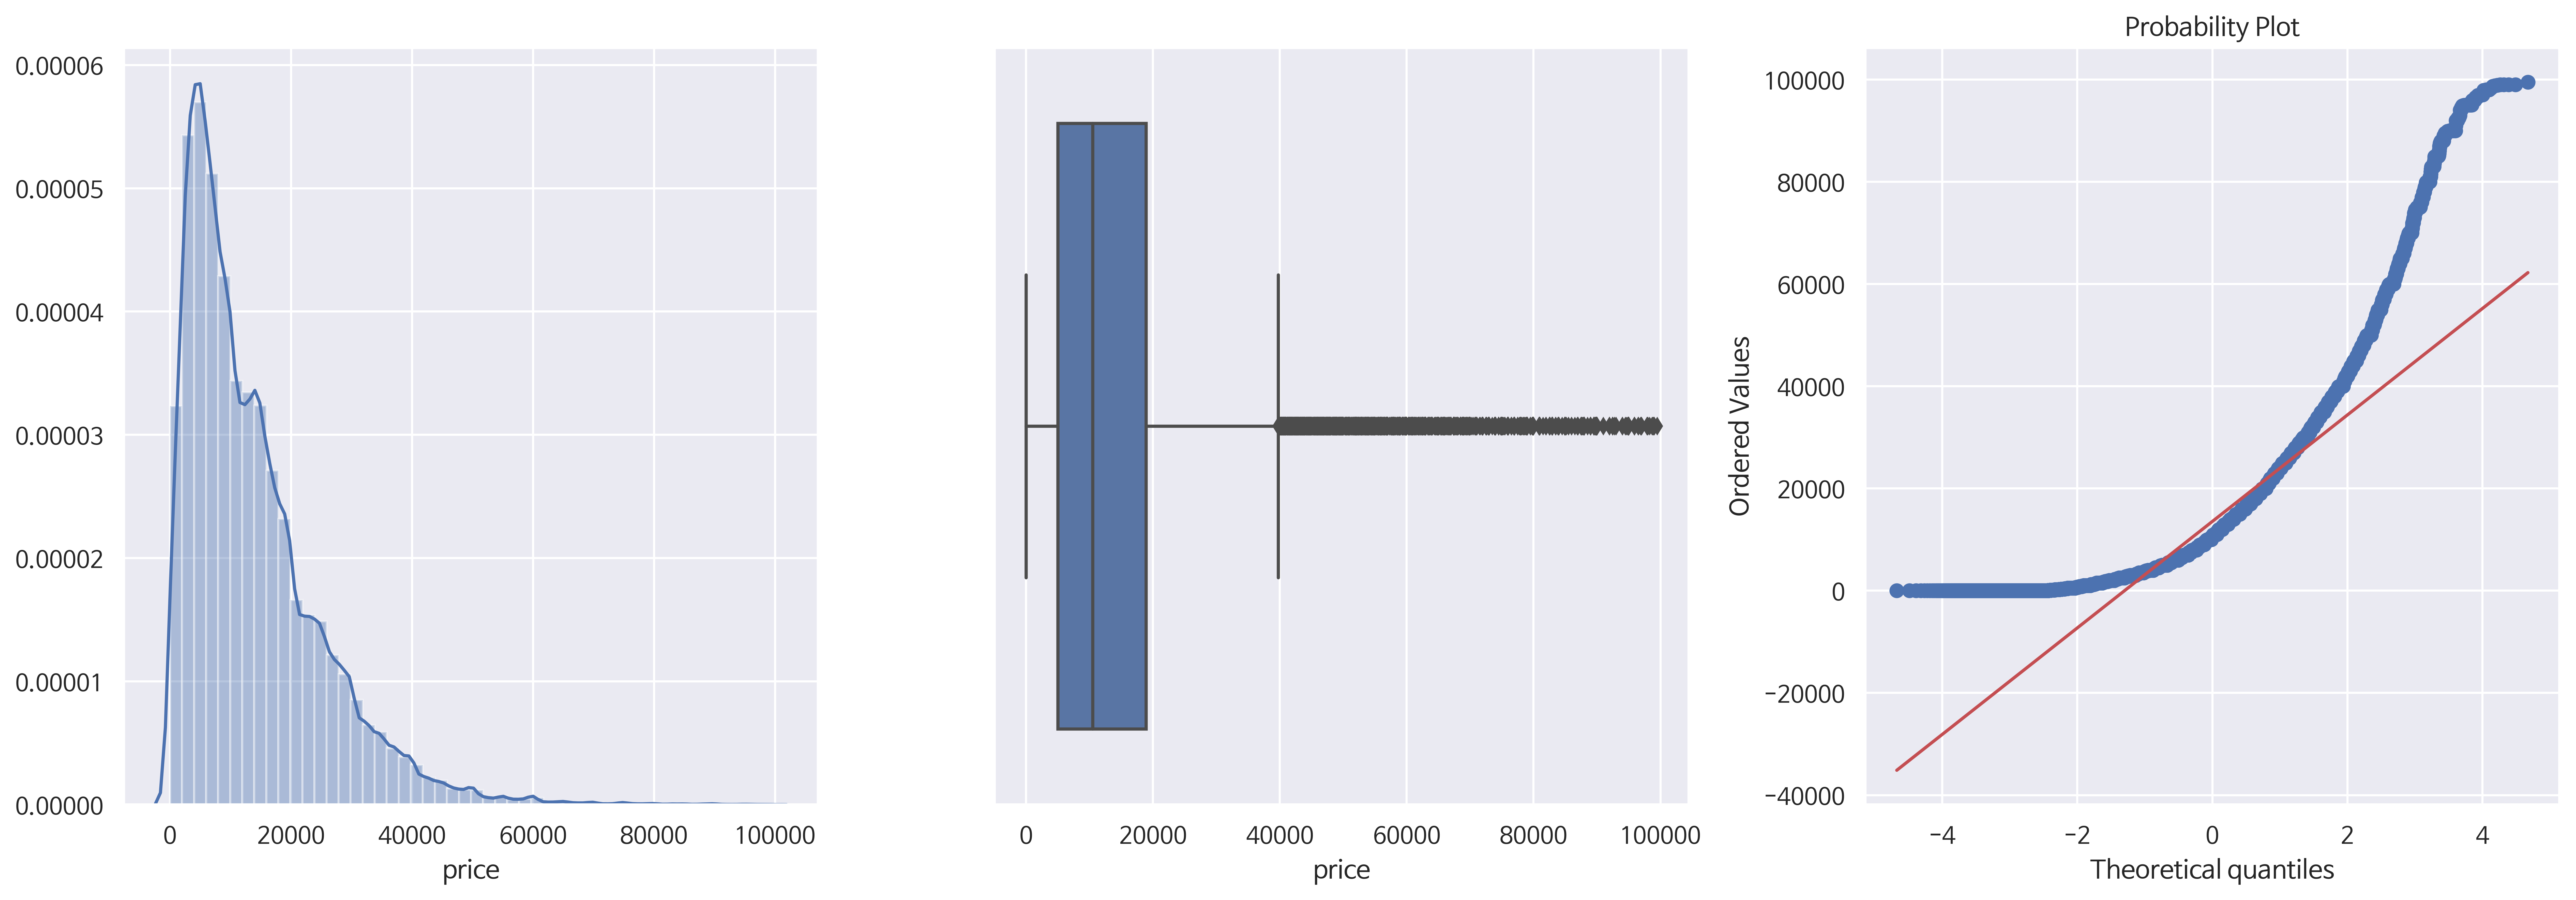

In [27]:
plt.figure(figsize=(17,6))

plt.subplot(131)
sns.distplot(test)

plt.subplot(132)
sns.boxplot(test)

plt.subplot(133)
stats.probplot(test,plot=plt)
plt.tight_layout()
plt.show()

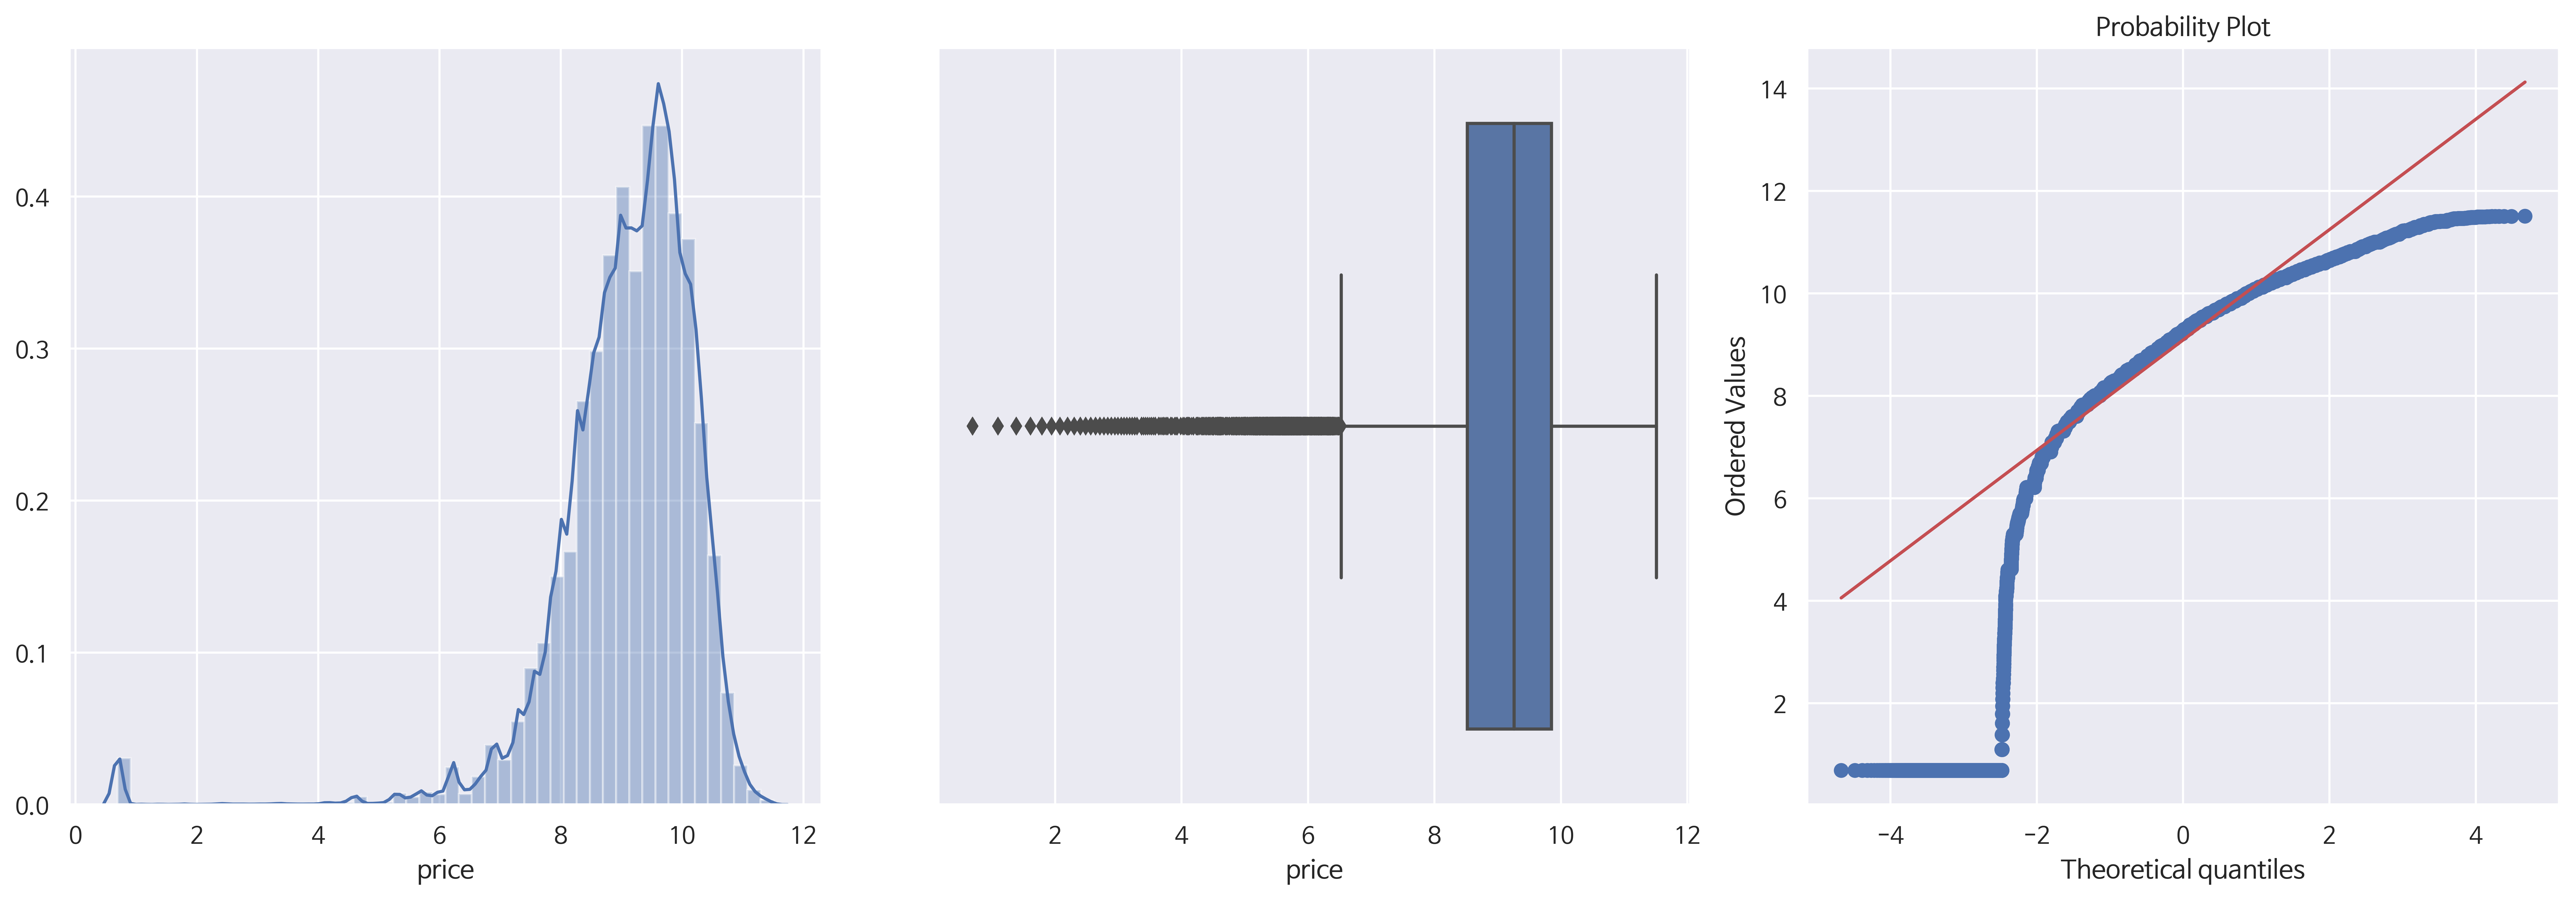

In [28]:
plt.figure(figsize=(17,6))

test2 = np.log1p(test)
plt.subplot(131)
sns.distplot(test2)

plt.subplot(132)
sns.boxplot(test2)

plt.subplot(133)
stats.probplot(test2,plot=plt)
plt.tight_layout()
plt.show()

# 변수 탐색
- 고유 ID : id
- 종속변수 : 가격(price)
- 독립변수
  - 카테고리 : 
    - 연료(fuel)
    - 실린더(cylinder)
    - 변속기(transmission)
    - 구동 방식(drive)
    - 차량 크기(size)
    - 색깔(paint_color)
    - 차량 상태(title_status)
    - **차량 타입(type)**
  - 실수형 
      - 연식(year), 주행거리(odometer)
- 제외한 데이터:
  - region_url, model,condition,vin,image_url,description,type

#### ID 값

In [70]:
df['id'].describe()

count       509577.00
mean    7044175513.51
std        4937218.52
min     6995212189.00
25%     7040801843.00
50%     7045324884.00
75%     7048556309.00
max     7050103253.00
Name: id, dtype: float64

In [69]:
len(df['id'].unique())

509577

In [68]:
len(df)

509577

### 3. 종속 변수의 특성
- 분포(histogram, descriptive statistics) , 아웃라이어, 미싱 데이터, 데이터가 가지는 특이사항

#### 가격

In [51]:
df['price'].describe(percentiles=[0,.50,.75,.80,.90,.999])

count       509577.00
mean         54796.84
std        9575025.12
min              0.00
0%               0.00
50%           9377.00
75%          17955.00
80%          19999.00
90%          27980.00
99.9%        98000.00
max     3600028900.00
Name: price, dtype: float64

In [52]:
df['price'].sort_values(ascending=False)[:20]

345972    3600028900
264595    3567587328
473874    2521176519
190773    2490531375
353470    1316134912
86485     1234567890
16015     1172420096
73946      999999999
176537     999999999
282099     999999999
496917     831365932
74292      123456789
466220     123456789
183054     123456789
222547     123456789
3509       123456789
379837     123456789
481420     111111111
109402     111111111
359795     100000000
Name: price, dtype: int64

### 4. 독립변수의 특성

## 실수형 독립변수

### 연식

In [64]:
df["year"].sort_values().unique()

array([1900., 1901., 1902., 1903., 1911., 1912., 1914., 1915., 1916.,
       1917., 1918., 1919., 1920., 1921., 1922., 1923., 1924., 1925.,
       1926., 1927., 1928., 1929., 1930., 1931., 1932., 1933., 1934.,
       1935., 1936., 1937., 1938., 1939., 1940., 1941., 1942., 1943.,
       1944., 1945., 1946., 1947., 1948., 1949., 1950., 1951., 1952.,
       1953., 1954., 1955., 1956., 1957., 1958., 1959., 1960., 1961.,
       1962., 1963., 1964., 1965., 1966., 1967., 1968., 1969., 1970.,
       1971., 1972., 1973., 1974., 1975., 1976., 1977., 1978., 1979.,
       1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016., 2017., 2018., 2019., 2020., 2021.,   nan])

In [134]:
len(df[df['year'] == 2021])

22

In [54]:
df["year"].describe()

count   508050.00
mean      2009.66
std          8.57
min       1900.00
25%       2007.00
50%       2011.00
75%       2015.00
max       2021.00
Name: year, dtype: float64

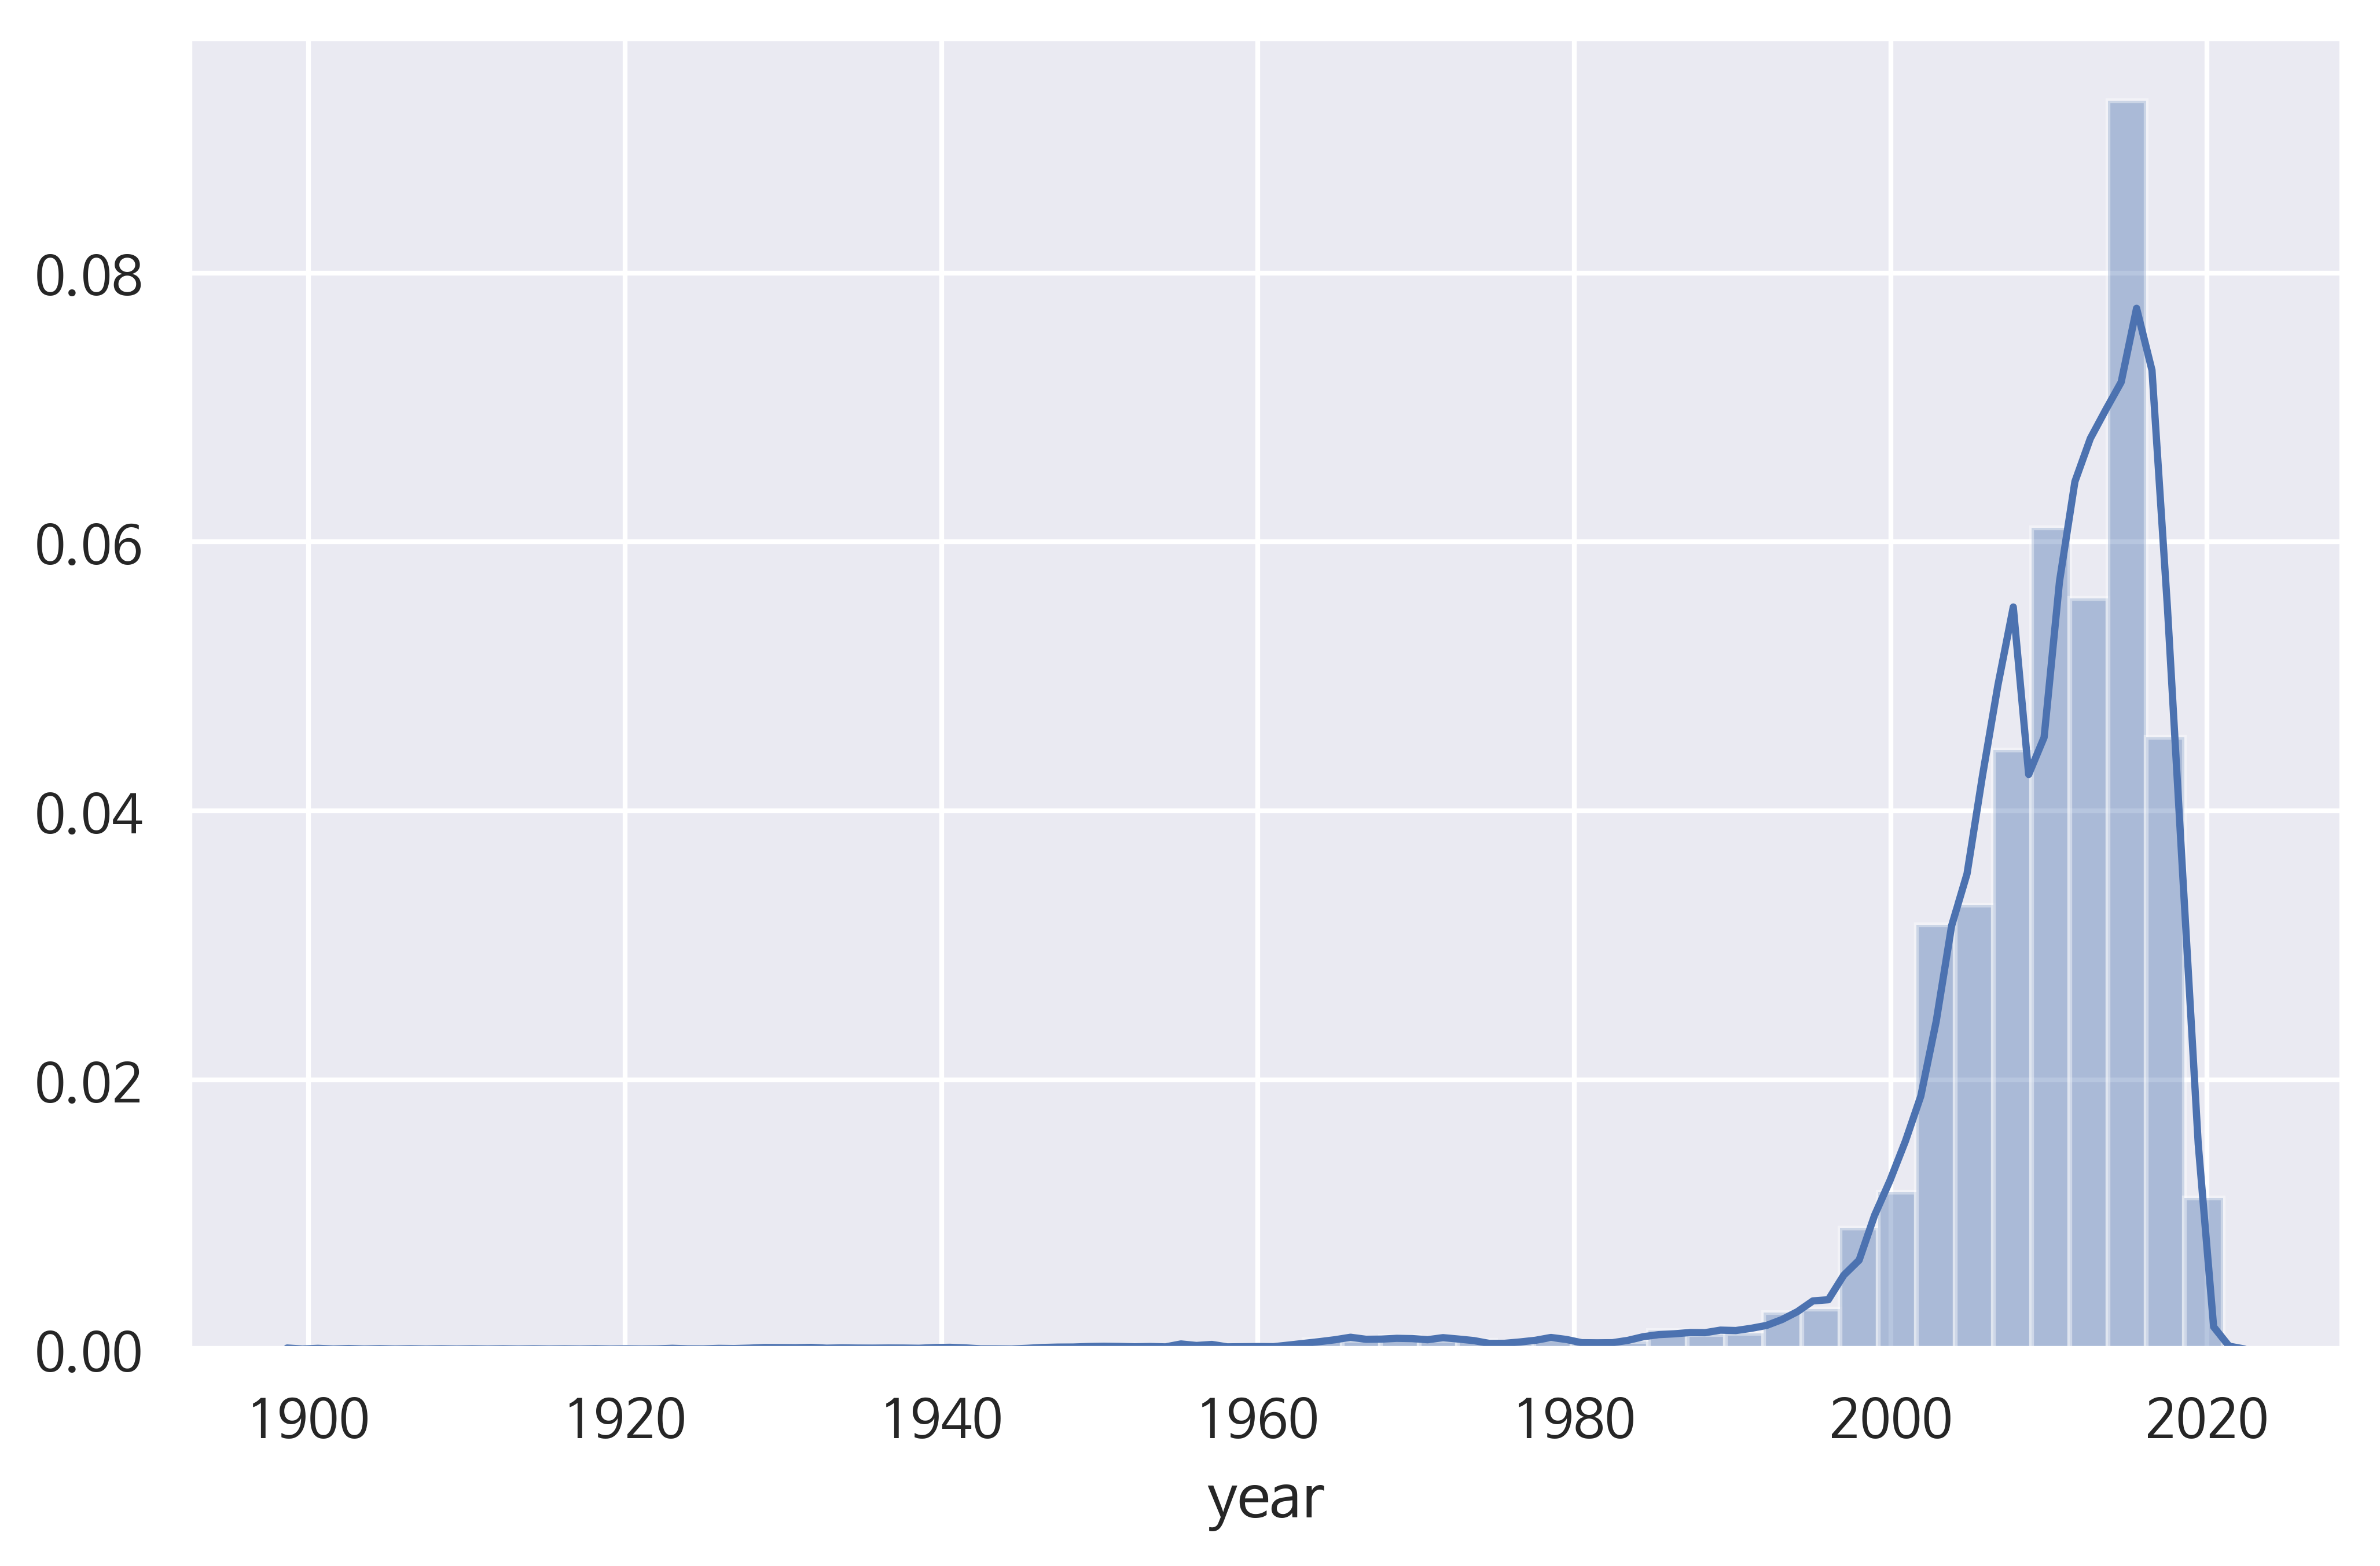

In [62]:
sns.distplot(df[df["year"].notnull()]['year'])
plt.show()

### 주행거리

In [19]:
df["odometer"].describe(percentiles=[0,.25,.50,.75,.80,.90,.999])

count     417253.00
mean      101729.96
std       107378.99
min            0.00
0%             0.00
25%        49488.00
50%        94894.00
75%       138778.00
80%       149598.00
90%       179664.80
99.9%     999999.00
max     10000000.00
Name: odometer, dtype: float64

In [27]:
# 0과 null값을 제거
filtered_odmeter = df[df["odometer"].notnull() & df["odometer"]!= 0]["odometer"]

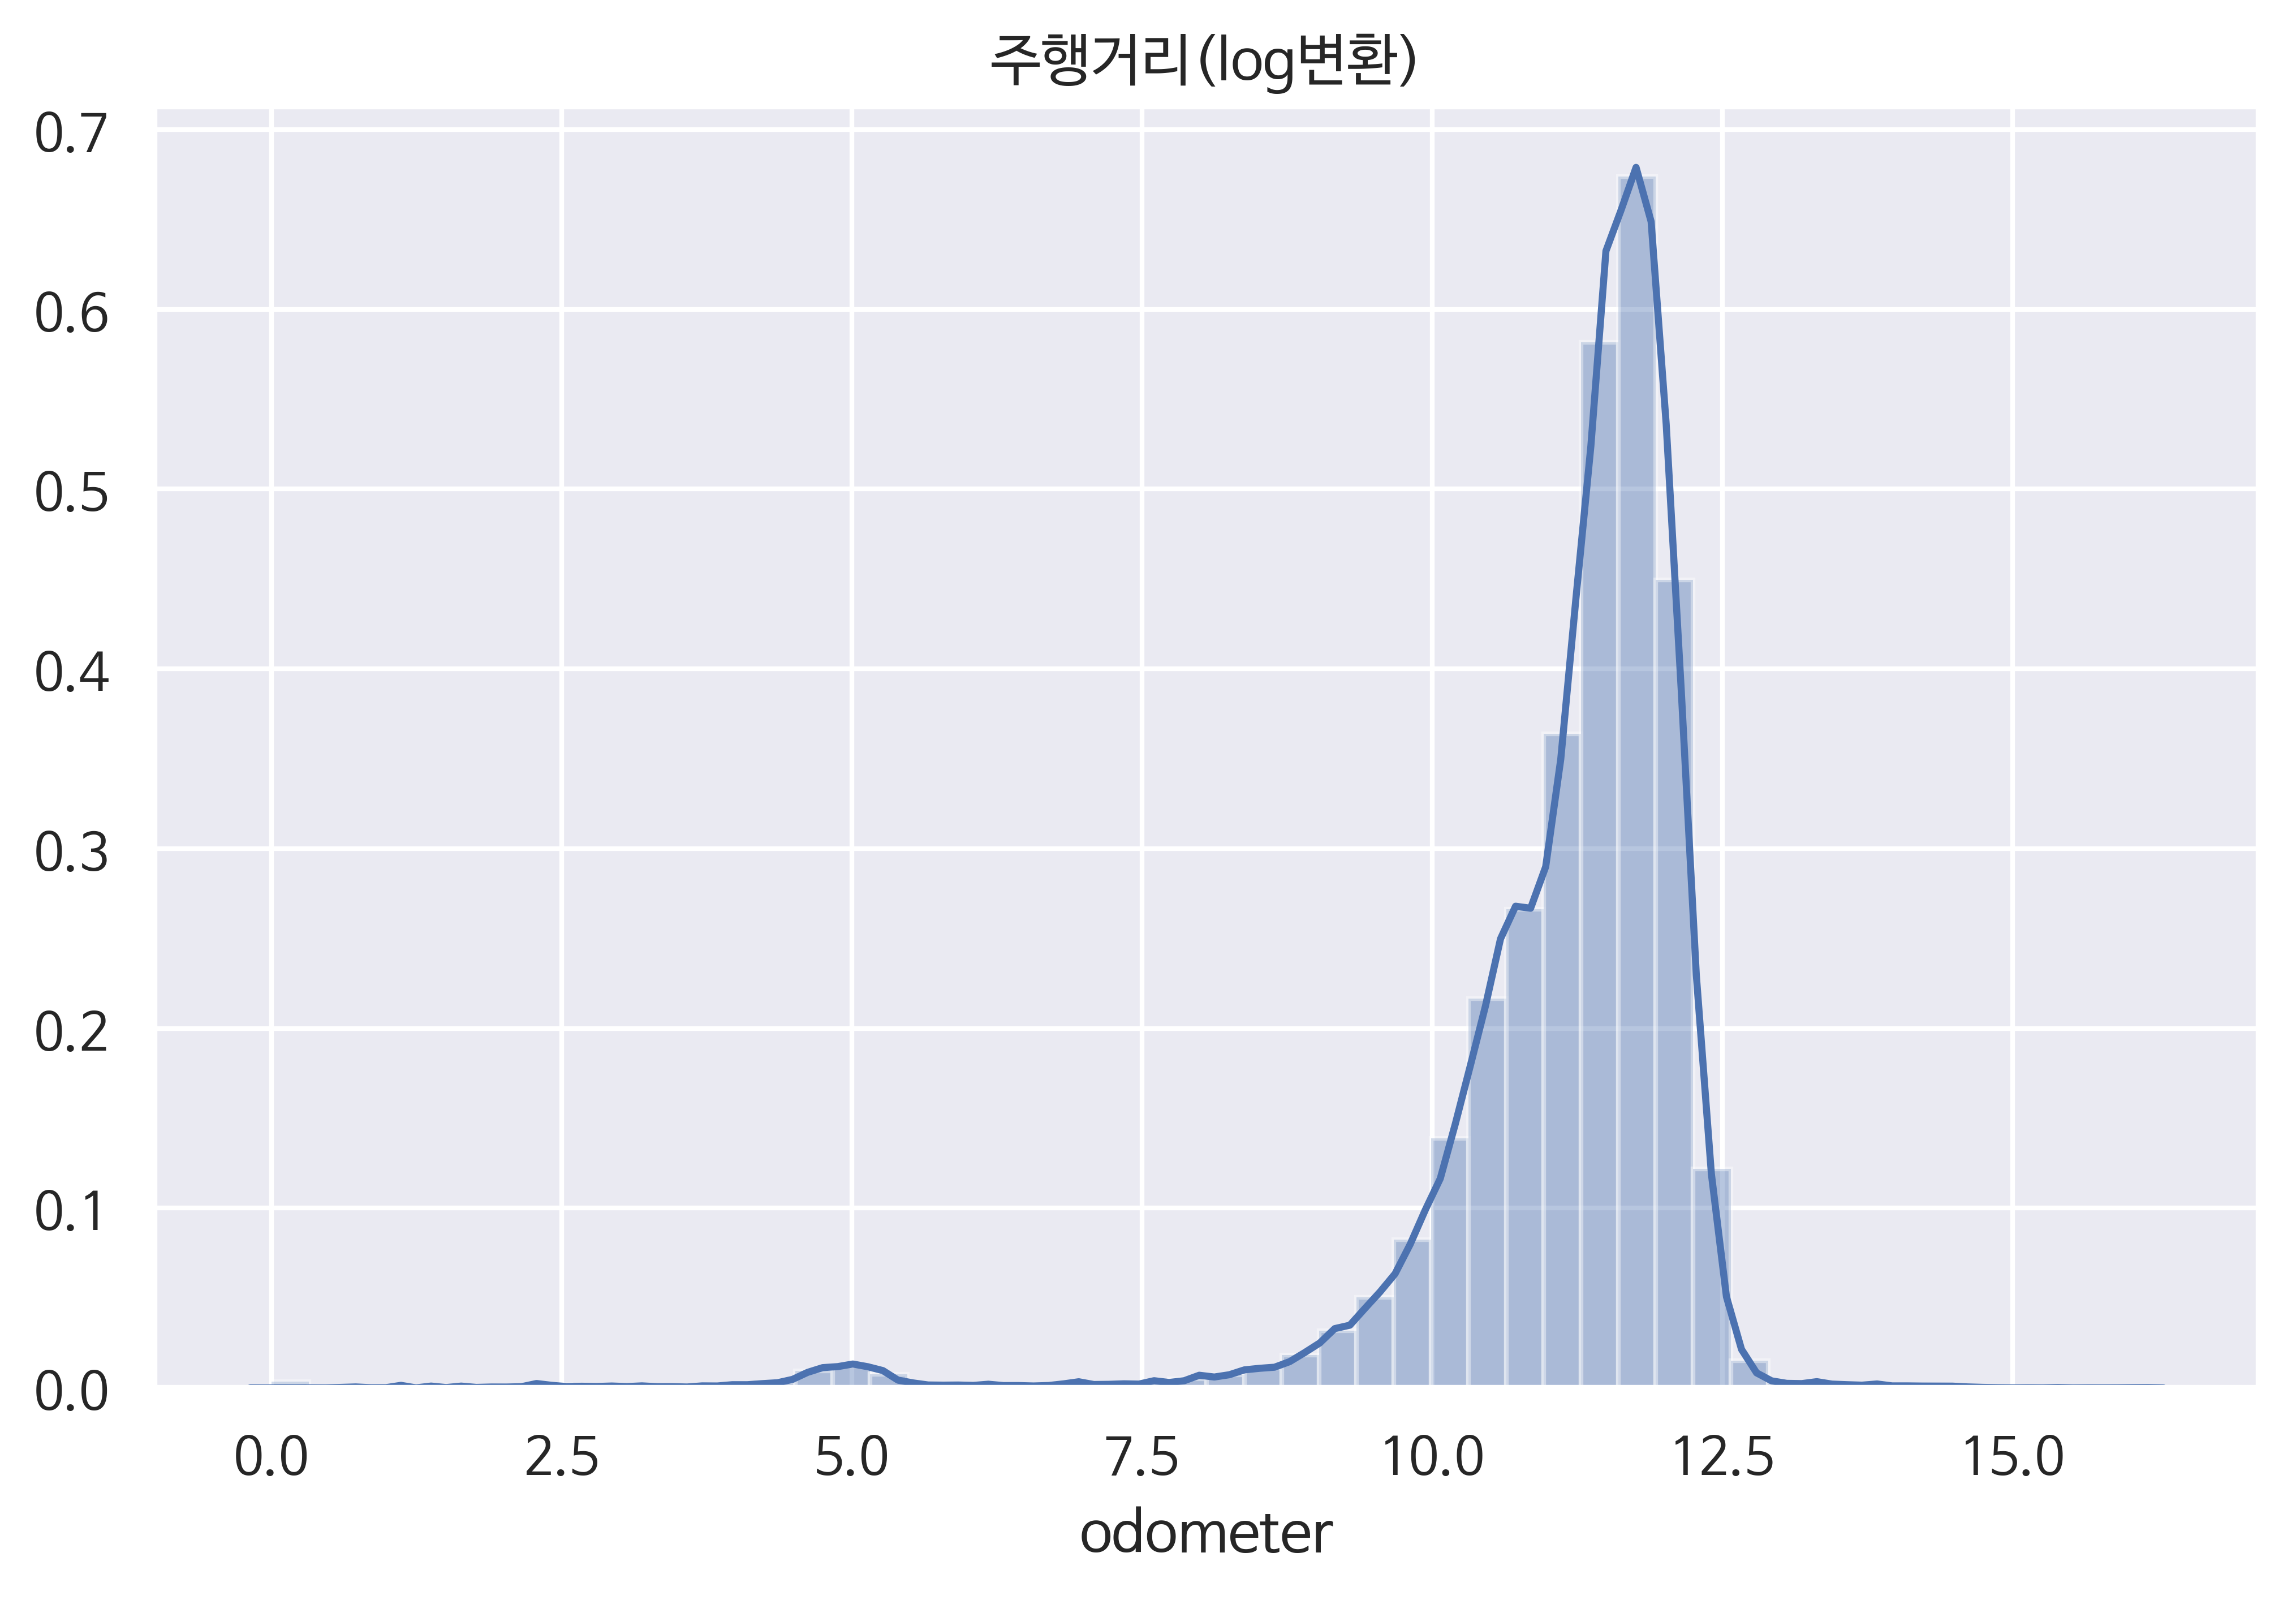

In [49]:
sns.distplot(np.log(filtered_odmeter))
plt.title("주행거리(log변환)")
plt.show()

## 카테고리 독립변수

### 지역

In [138]:
df["region"].describe()

count           509577
unique             403
top       fayetteville
freq              4501
Name: region, dtype: object

### 제조사

In [139]:
df["manufacturer"].describe()

count     486813
unique        43
top         ford
freq       92601
Name: manufacturer, dtype: object

In [140]:
len(df[df['manufacturer'].isnull()])

22764

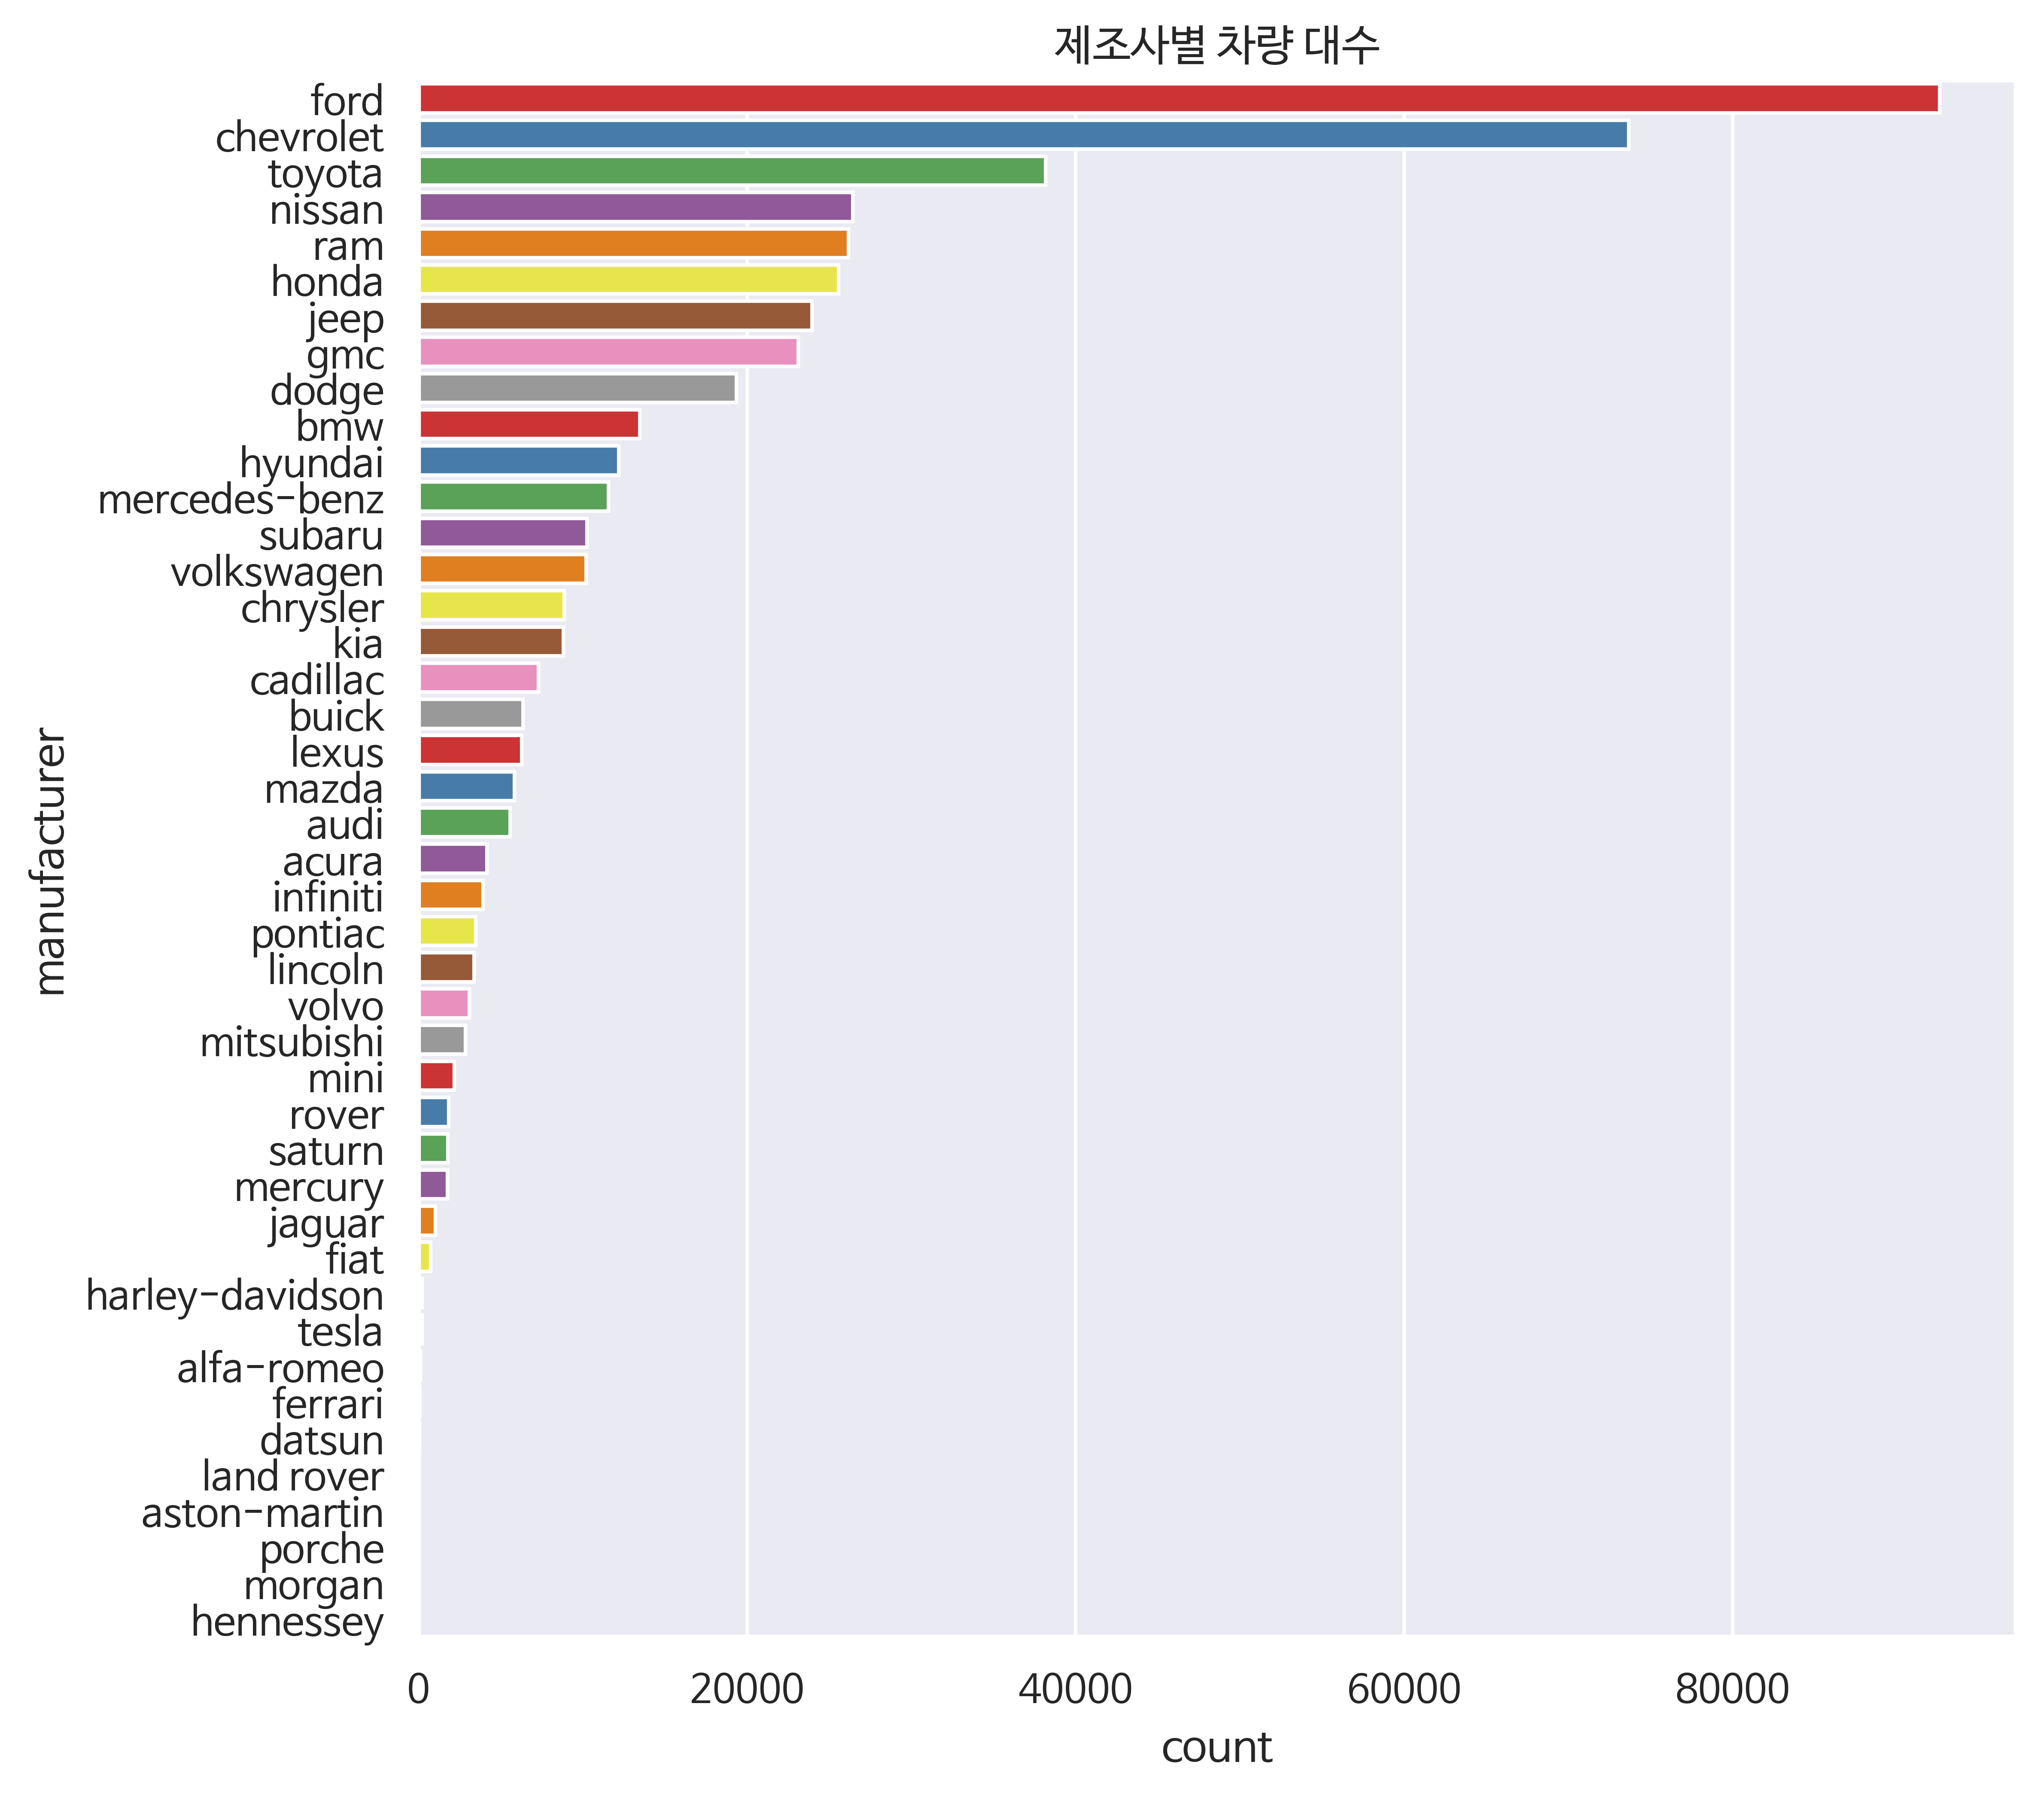

In [142]:
plt.figure(figsize=(8,8))
sns.countplot(
    data = df,
    y = "manufacturer",
    palette='Set1',
    order = df['manufacturer'].value_counts().index

)
plt.title("제조사별 차량 대수")
plt.show()

### 실린더

In [122]:
df["cylinders"].describe()

count          309894
unique              8
top       6 cylinders
freq           111940
Name: cylinders, dtype: object

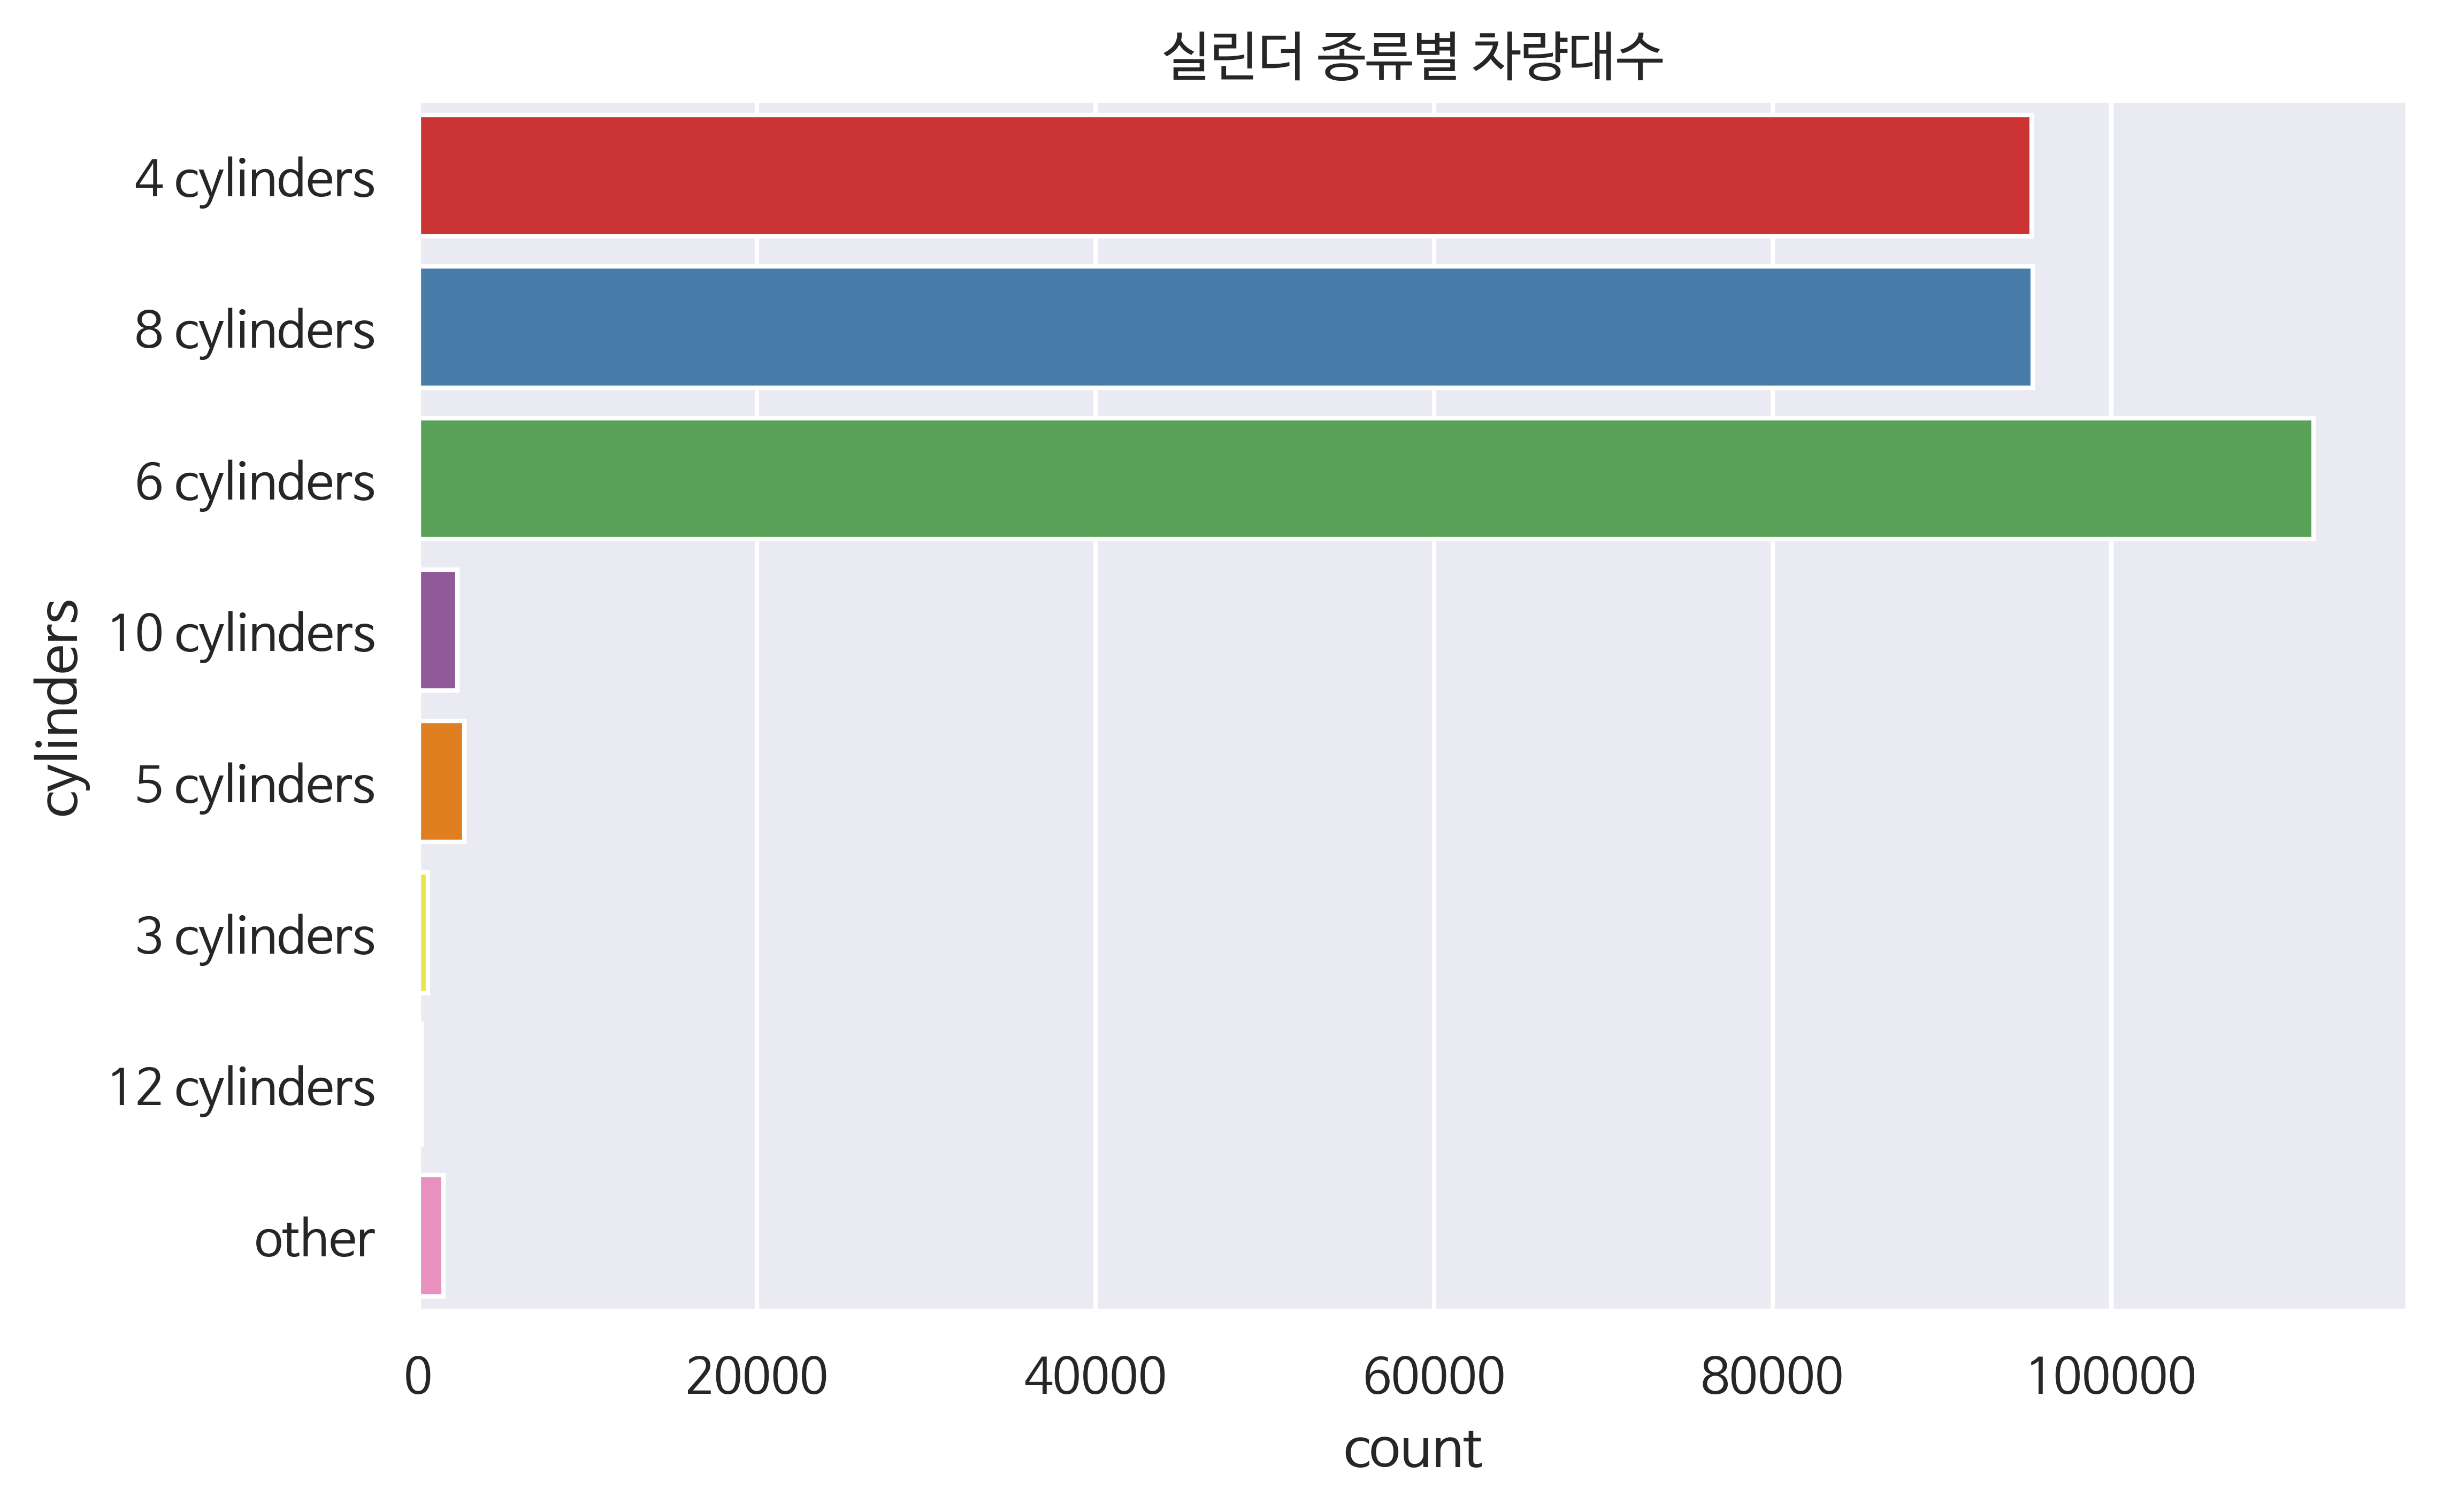

In [47]:
sns.countplot(
    data = df,
    y = "cylinders",
    palette='Set1'
)
plt.title("실린더 종류별 차량대수")
plt.show()

### fuel

In [132]:
df["fuel"].describe()

count     505592
unique         5
top          gas
freq      441688
Name: fuel, dtype: object

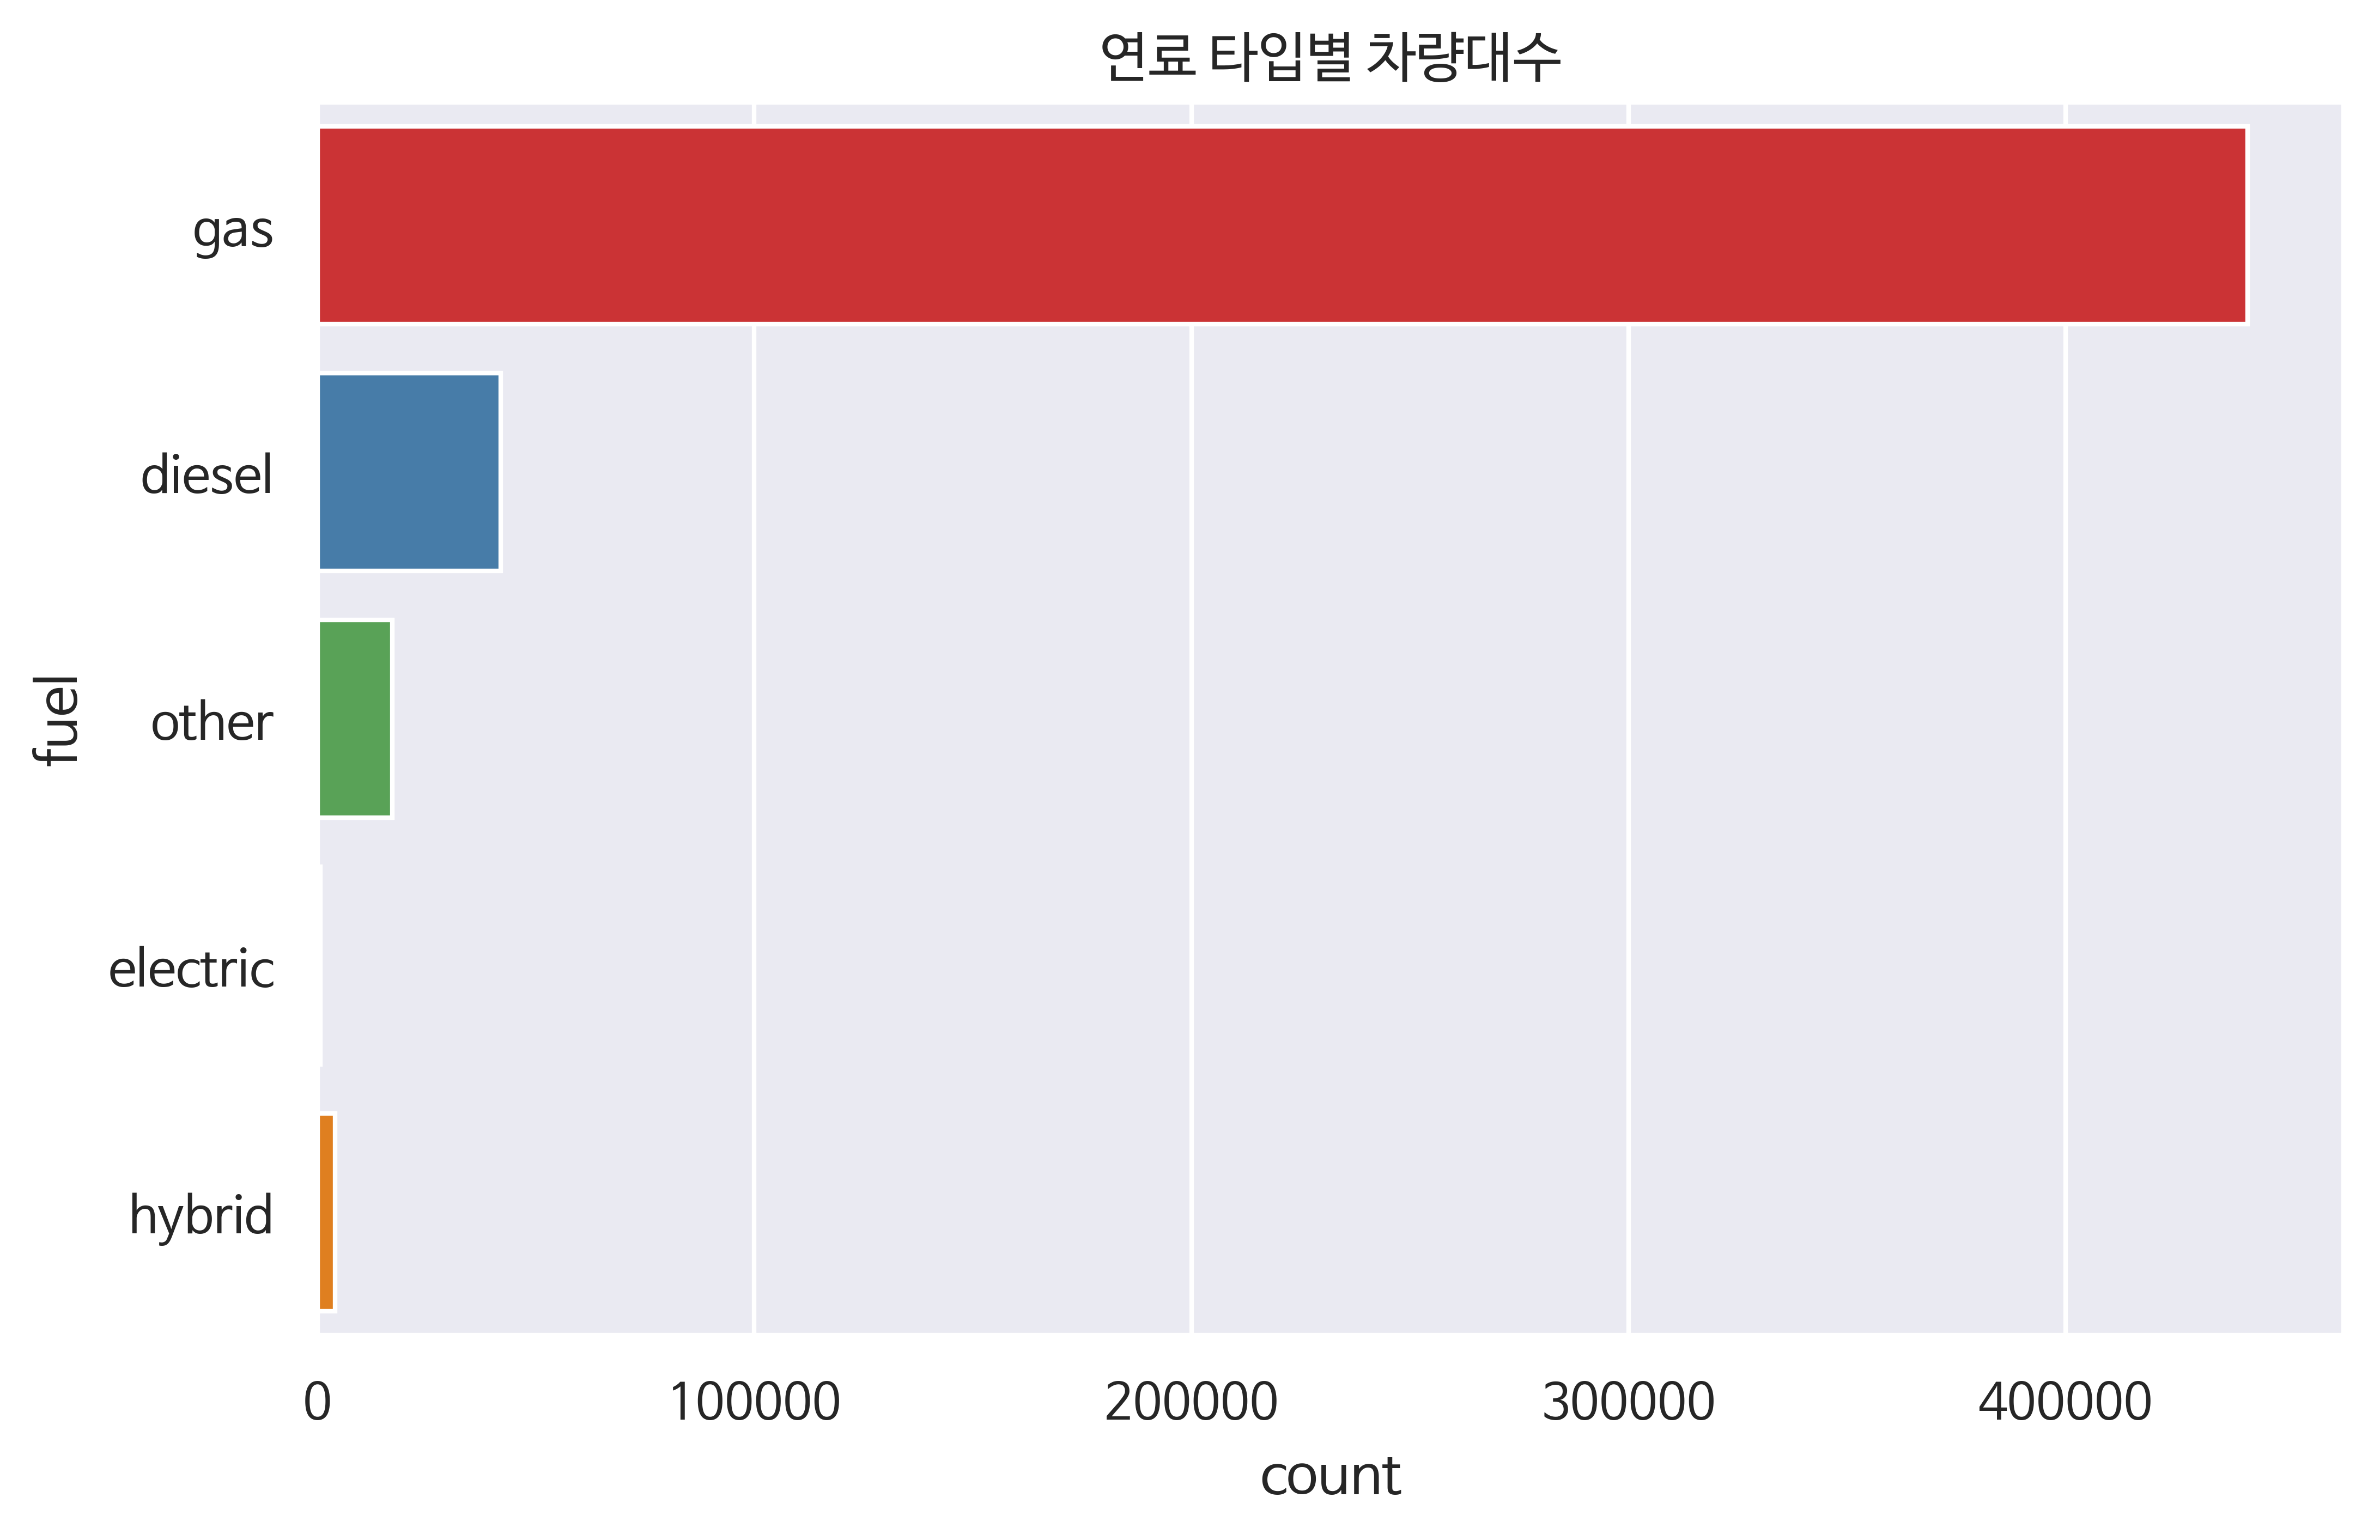

In [48]:
sns.countplot(
    data = df,
    y = "fuel",
    palette='Set1'
)
plt.title("연료 타입별 차량대수")
plt.show()

### 차량 사고 유무

In [33]:
df['title_status'].describe()

count     506515
unique         6
top        clean
freq      487040
Name: title_status, dtype: object

In [151]:
len(df[df['title_status'].isnull()])

3062

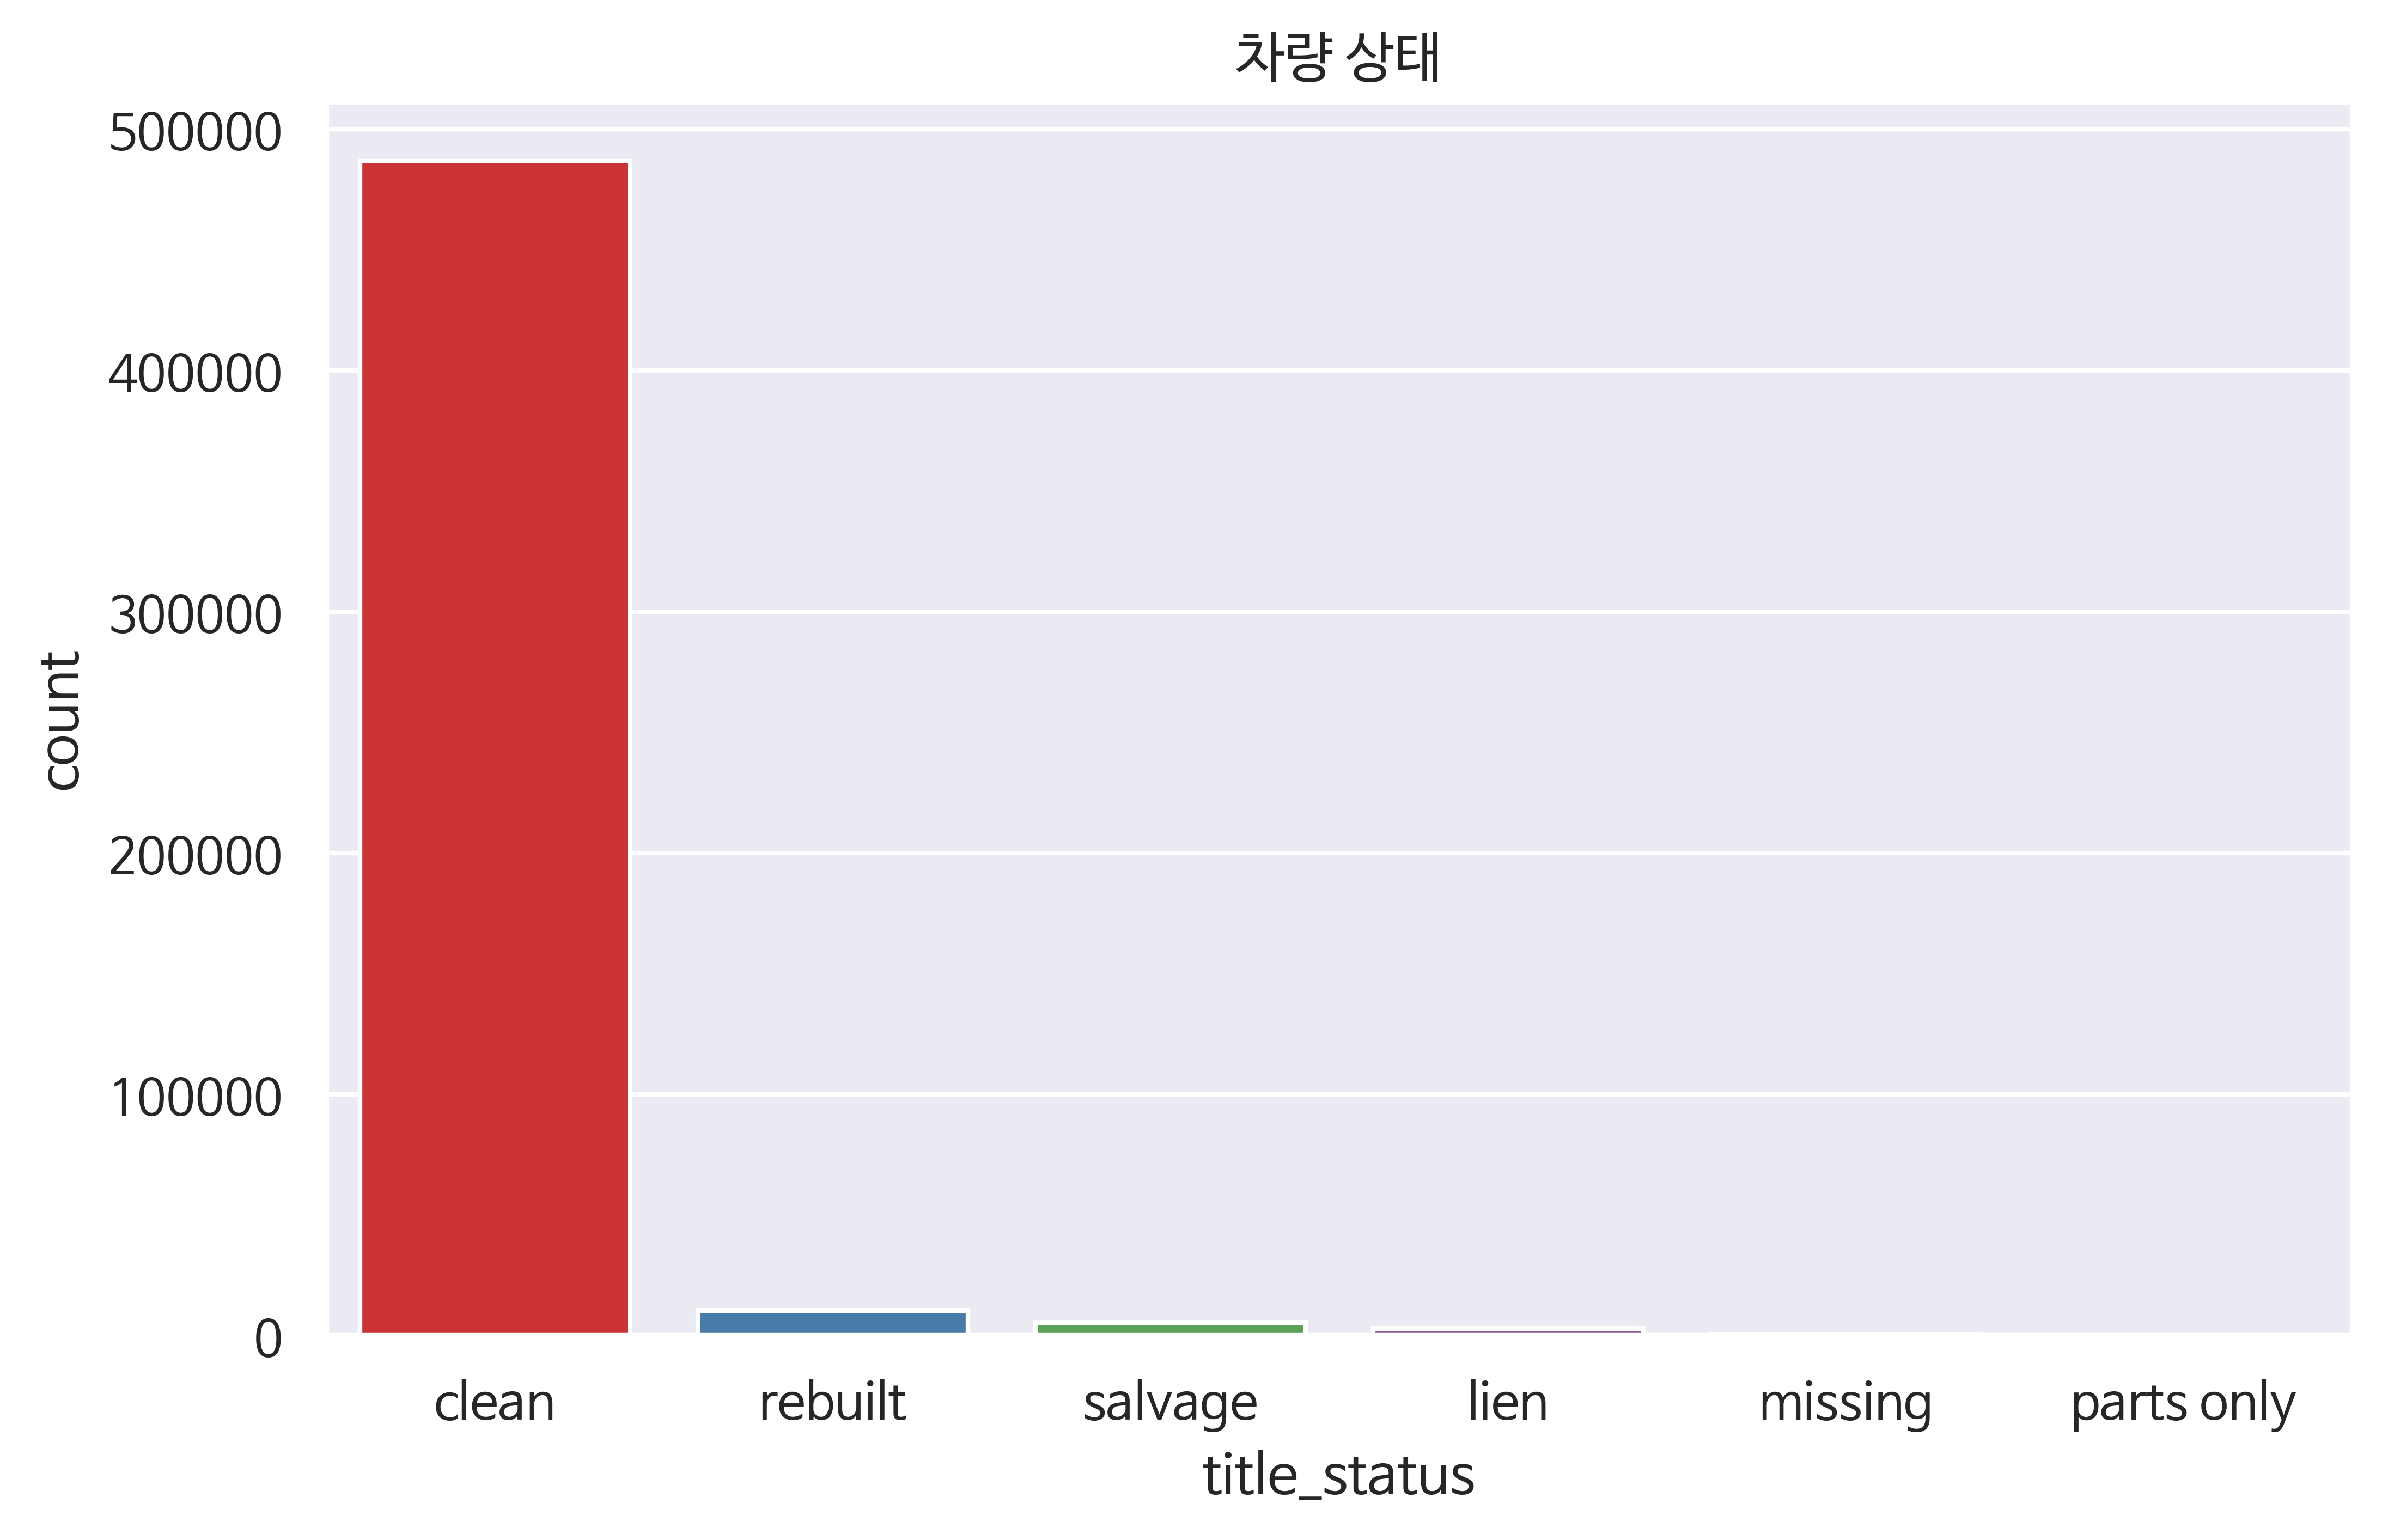

In [50]:
sns.countplot(
    data = df,
    x = "title_status",
    palette='Set1'
)
plt.title("차량 상태")
plt.show()

### 변속기

In [51]:
df['transmission'].describe()

count        505858
unique            3
top       automatic
freq         457659
Name: transmission, dtype: object

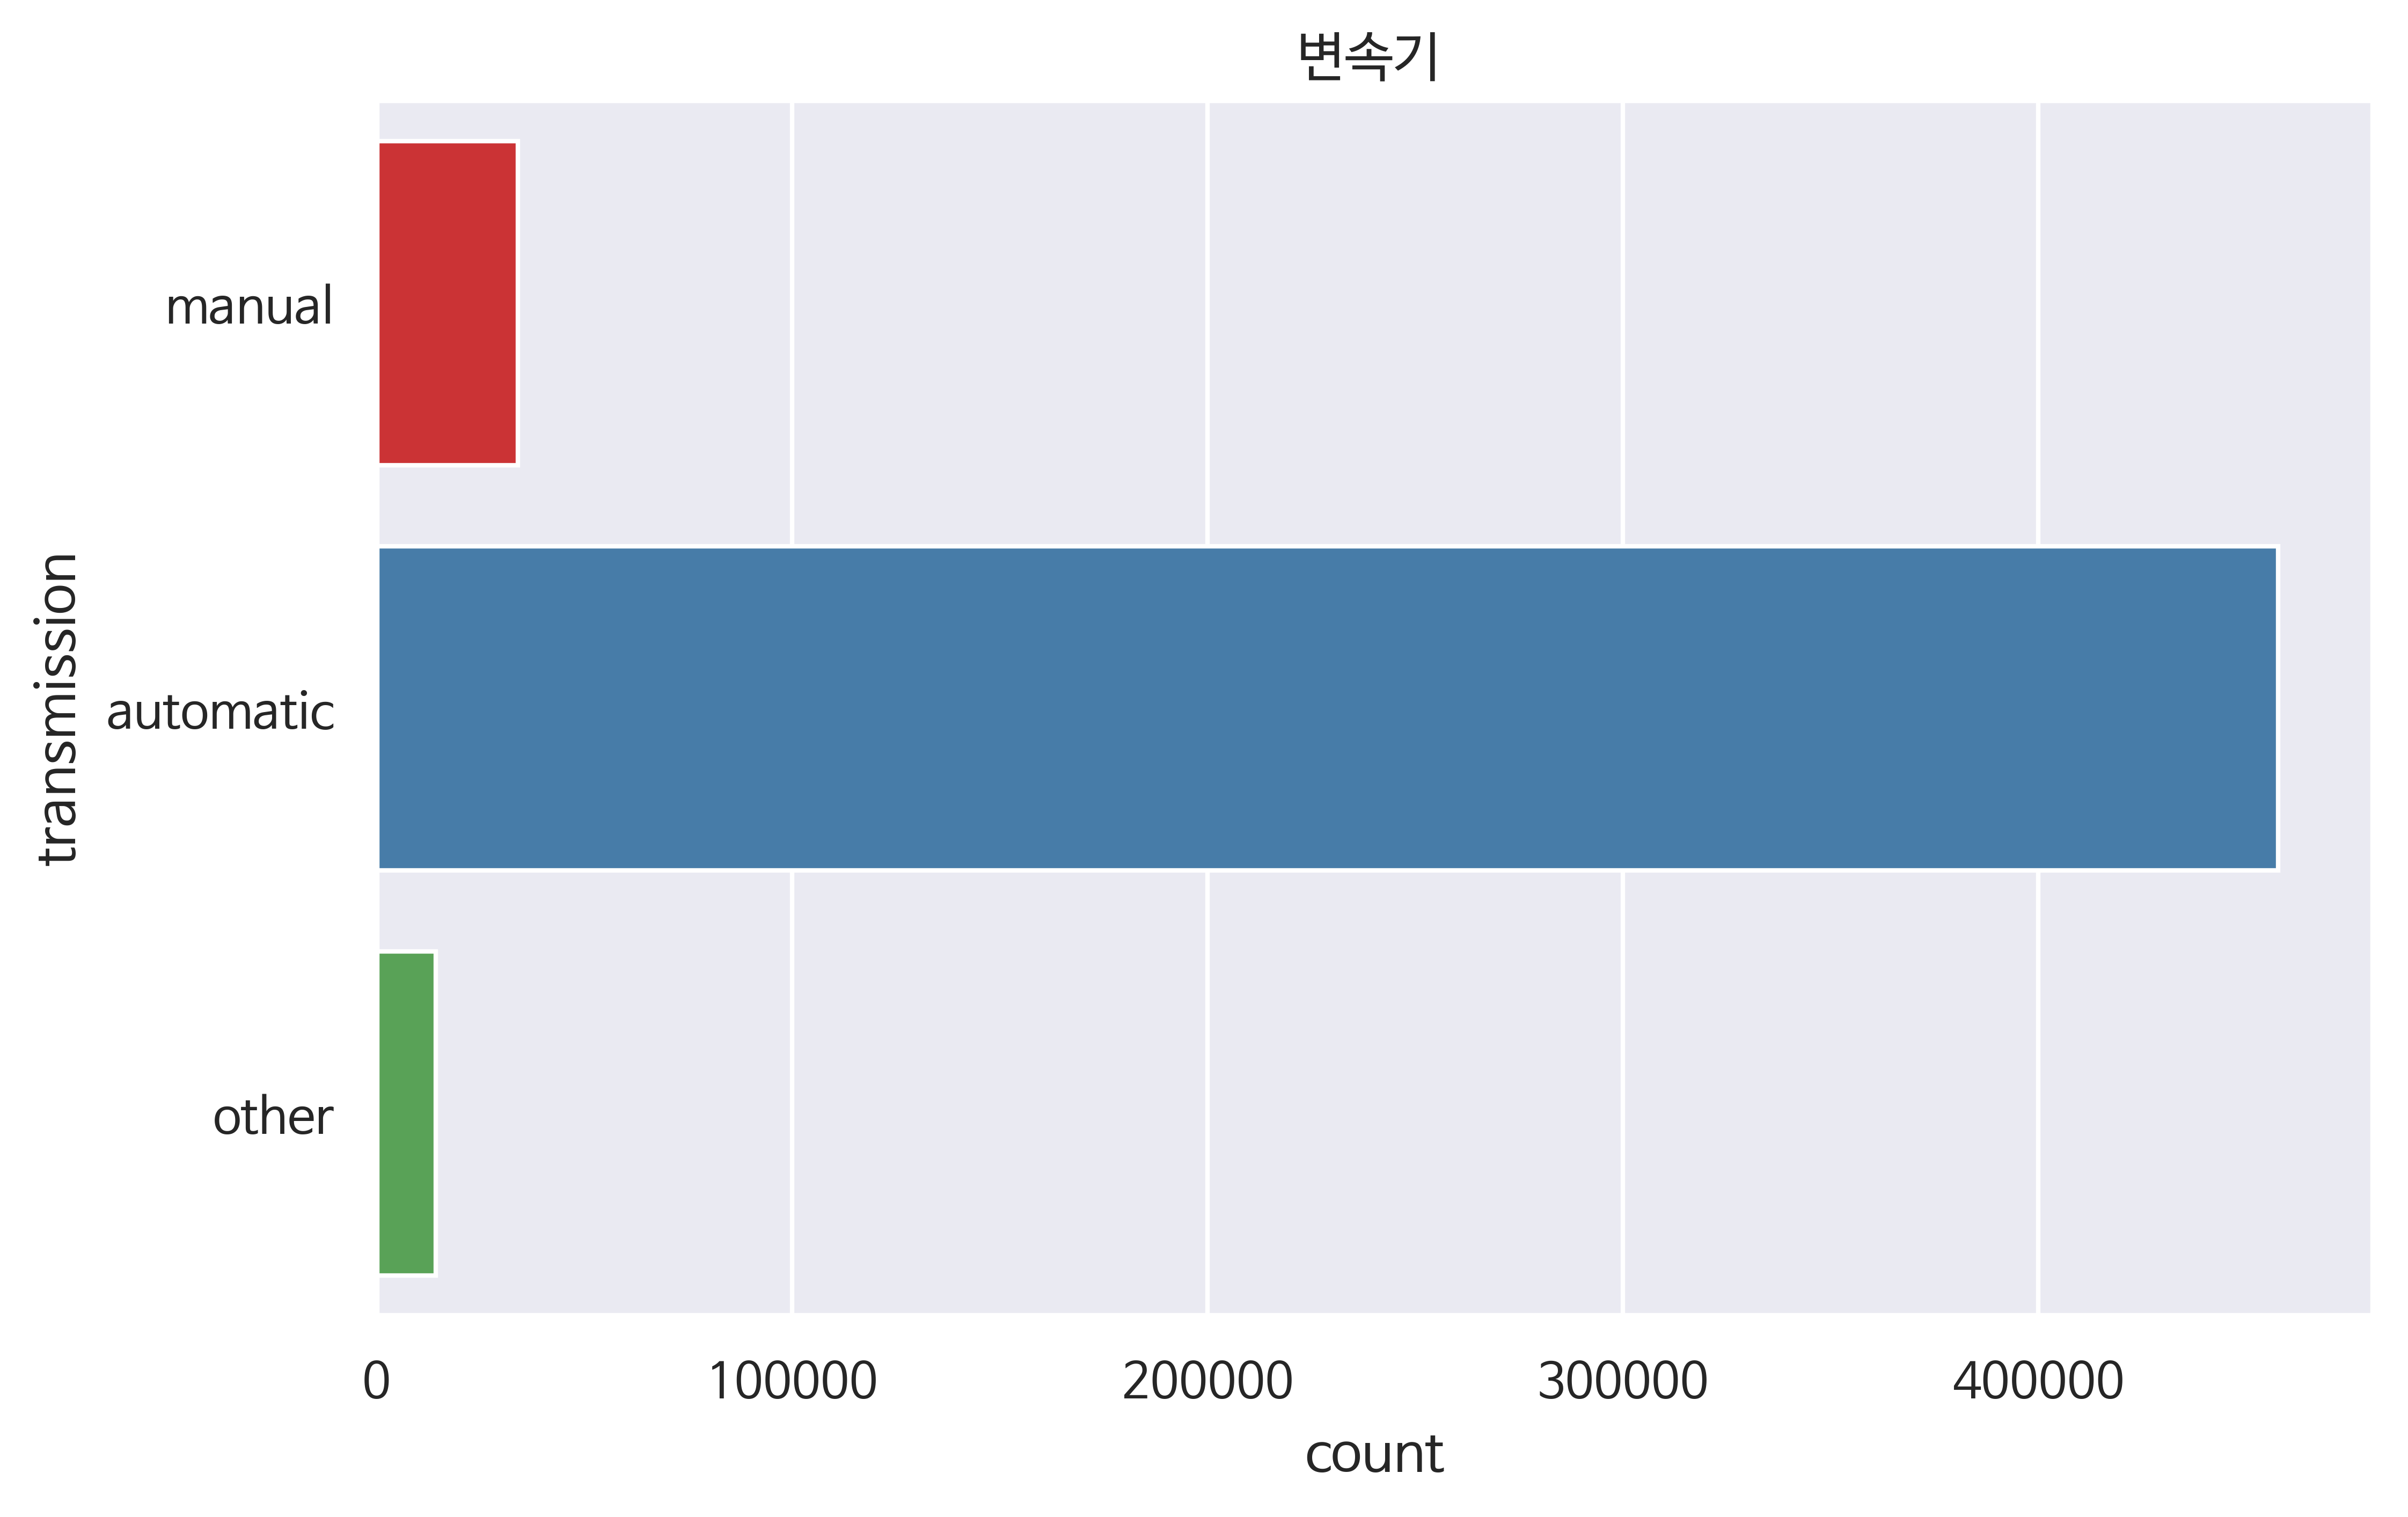

In [55]:
sns.countplot(
    data = df,
    y = "transmission",
    palette='Set1'
)
plt.title("변속기 ")
plt.show()

### 구동 방식

In [57]:
df['drive'].describe()

count     365434
unique         3
top          4wd
freq      170482
Name: drive, dtype: object

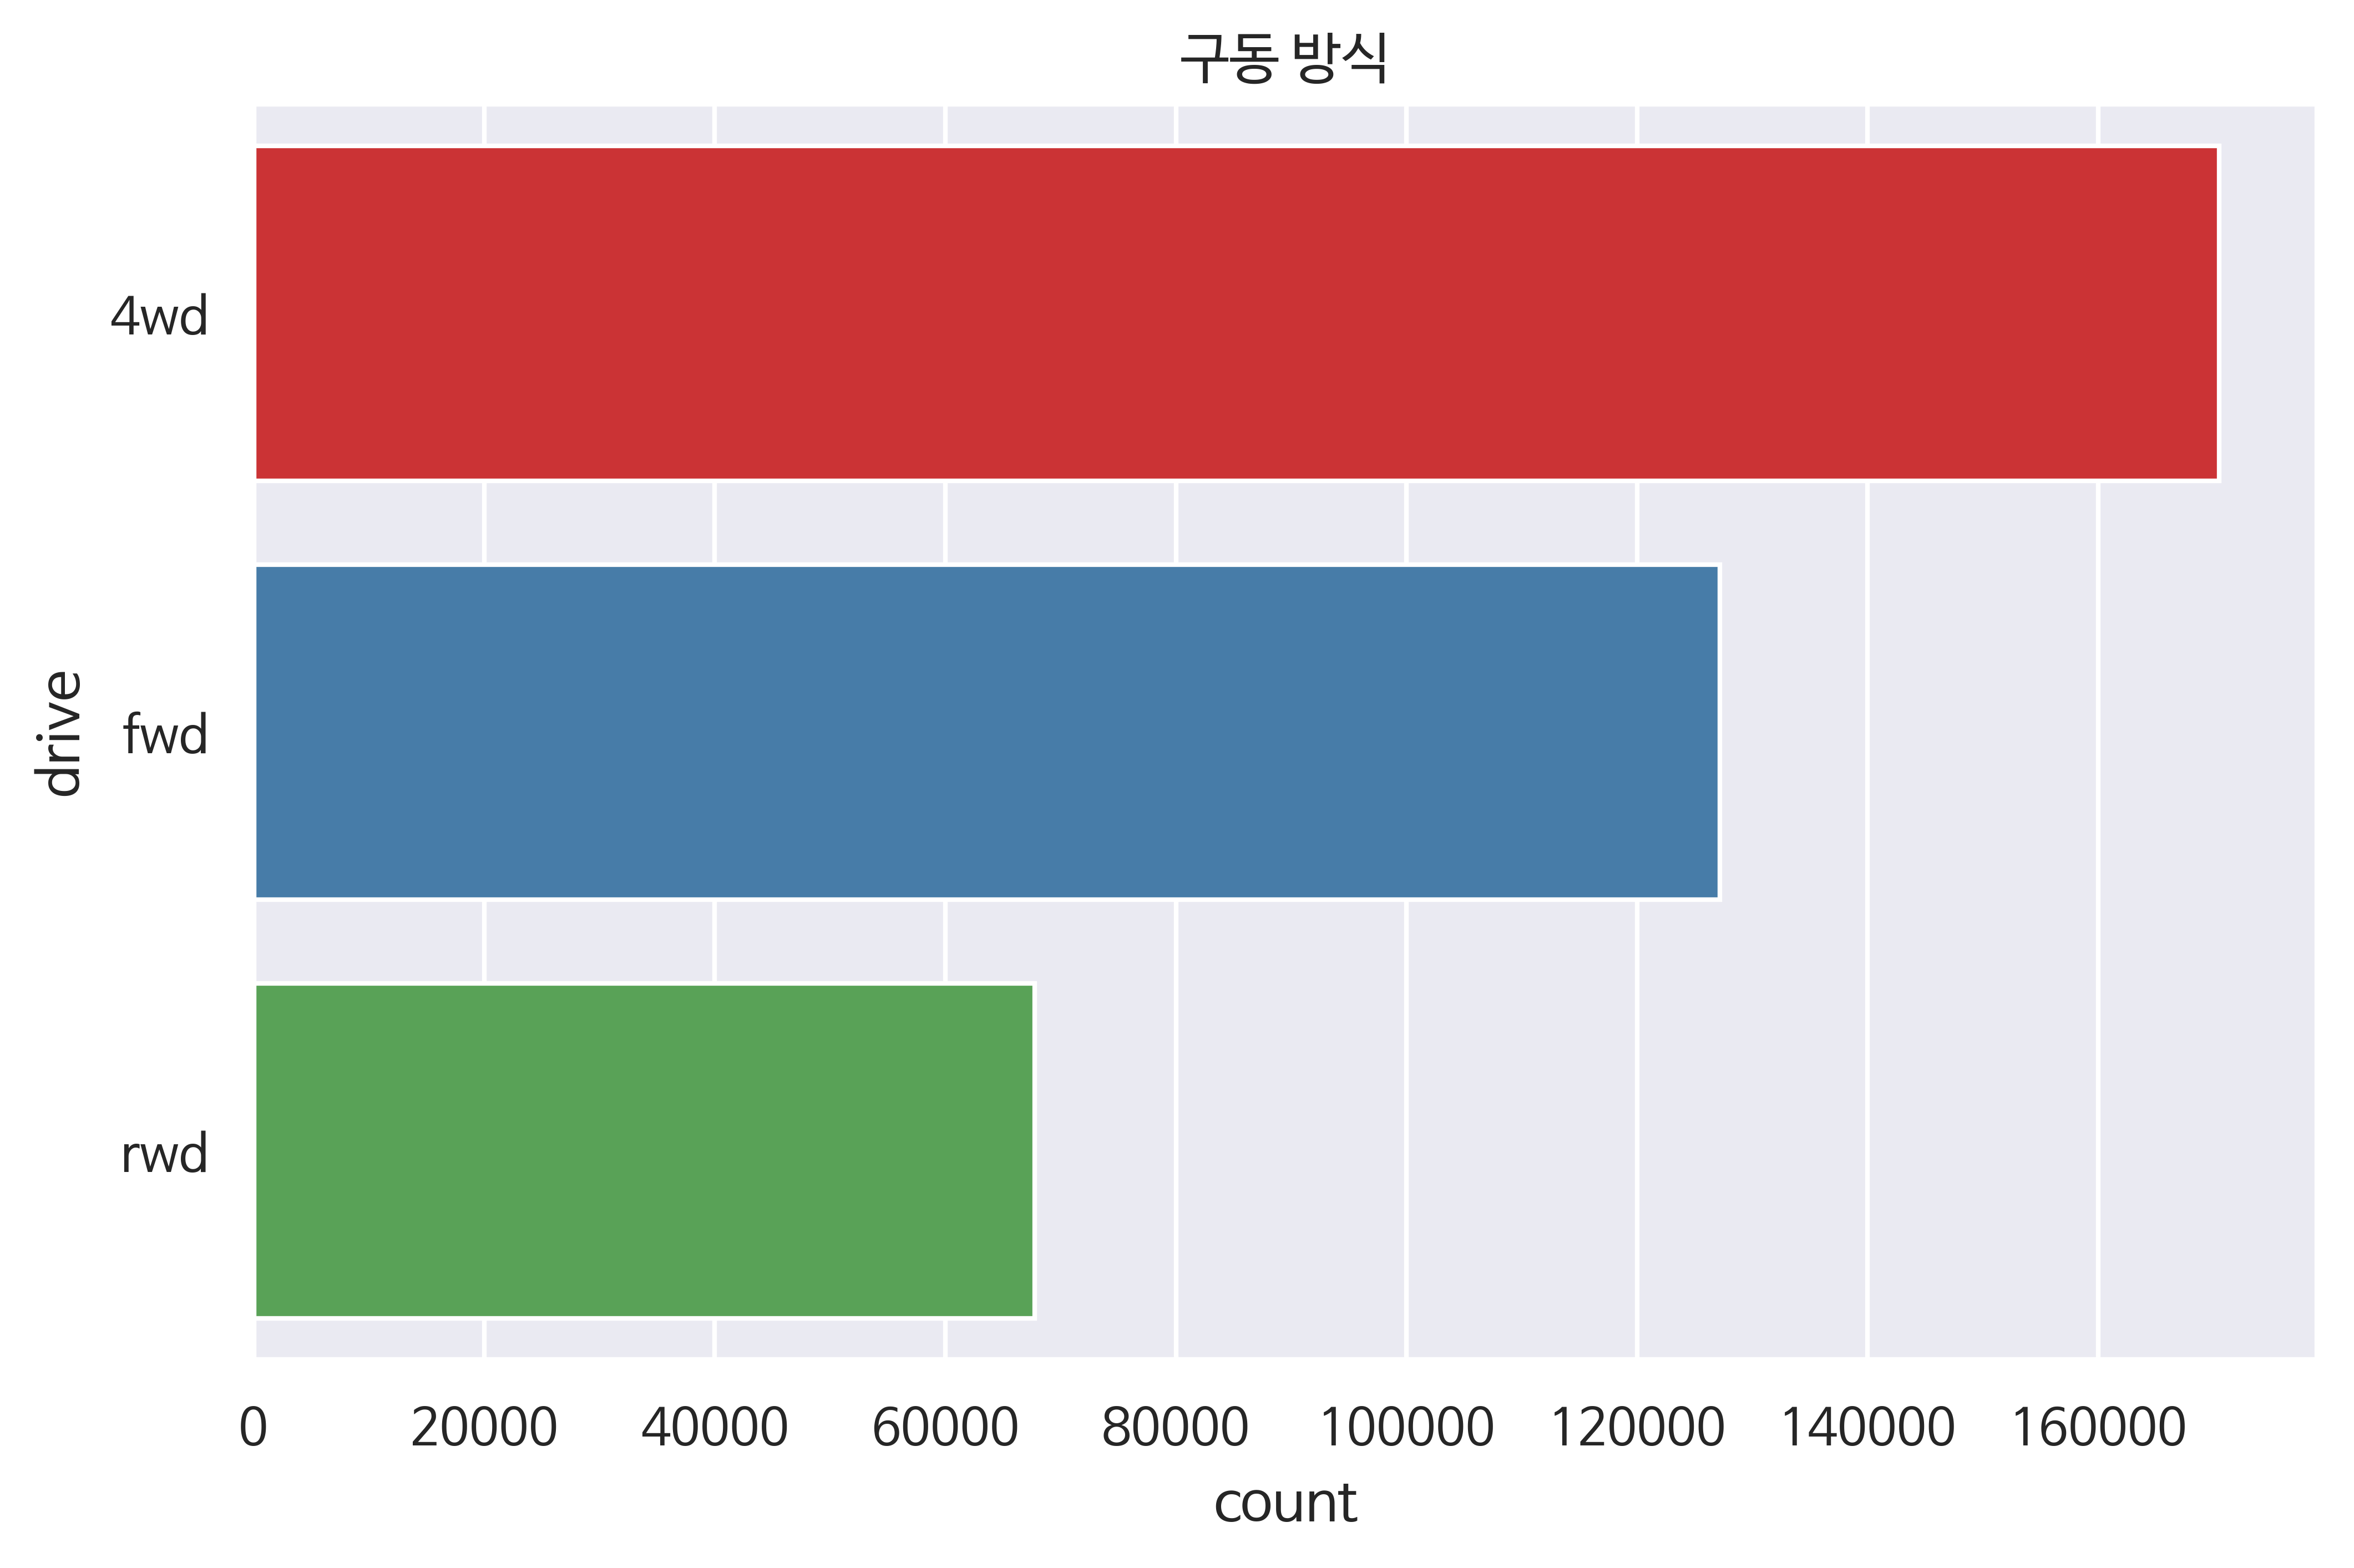

In [59]:
sns.countplot(
    data = df,
    y = "drive",
    palette='Set1'
)
plt.title("구동 방식")
plt.show()

### 차량 크기

In [60]:
df['size'].describe()

count        167574
unique            4
top       full-size
freq          90481
Name: size, dtype: object

In [141]:
len(df[df['size'].isnull()])

342003

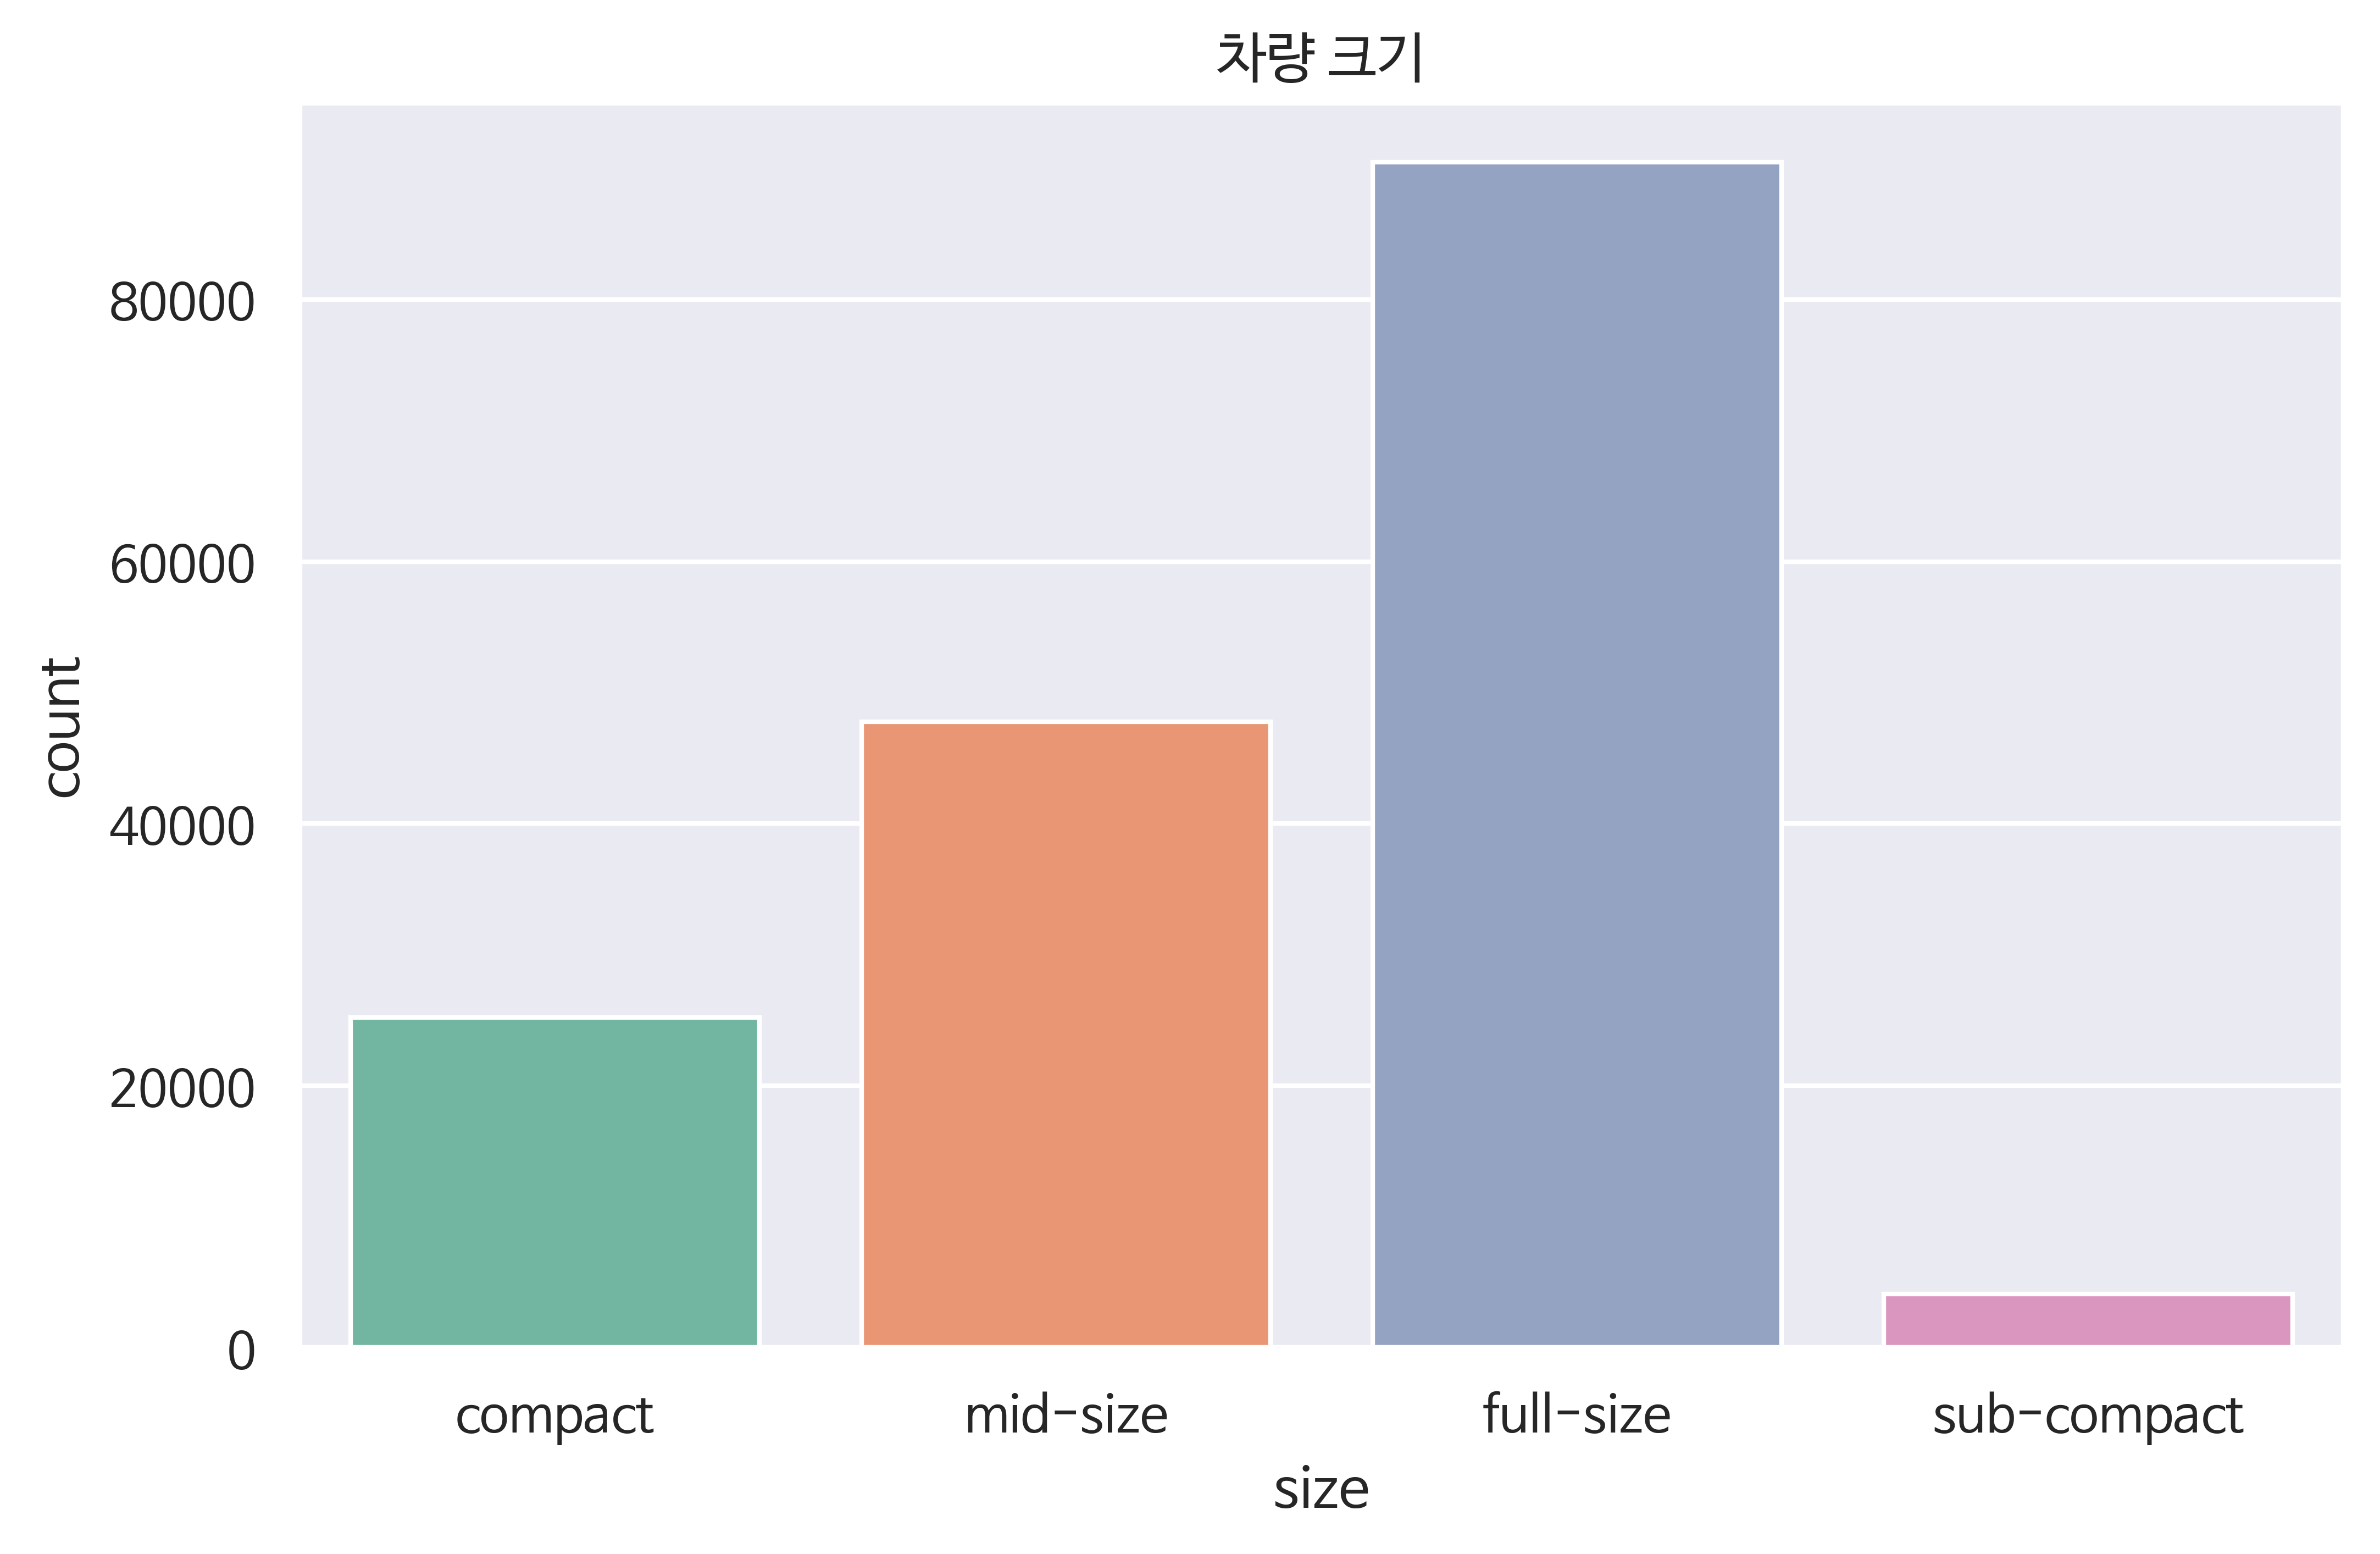

In [21]:
# plt.figure(figsize=(8,8))
sns.countplot(
    data = df,
    x = "size",
    palette='Set2'
)
plt.title("차량 크기")
plt.show()

### 차량 색깔

In [72]:
df["paint_color"].describe()

count     344871
unique        12
top        white
freq       89322
Name: paint_color, dtype: object

<function matplotlib.pyplot.show(*args, **kw)>

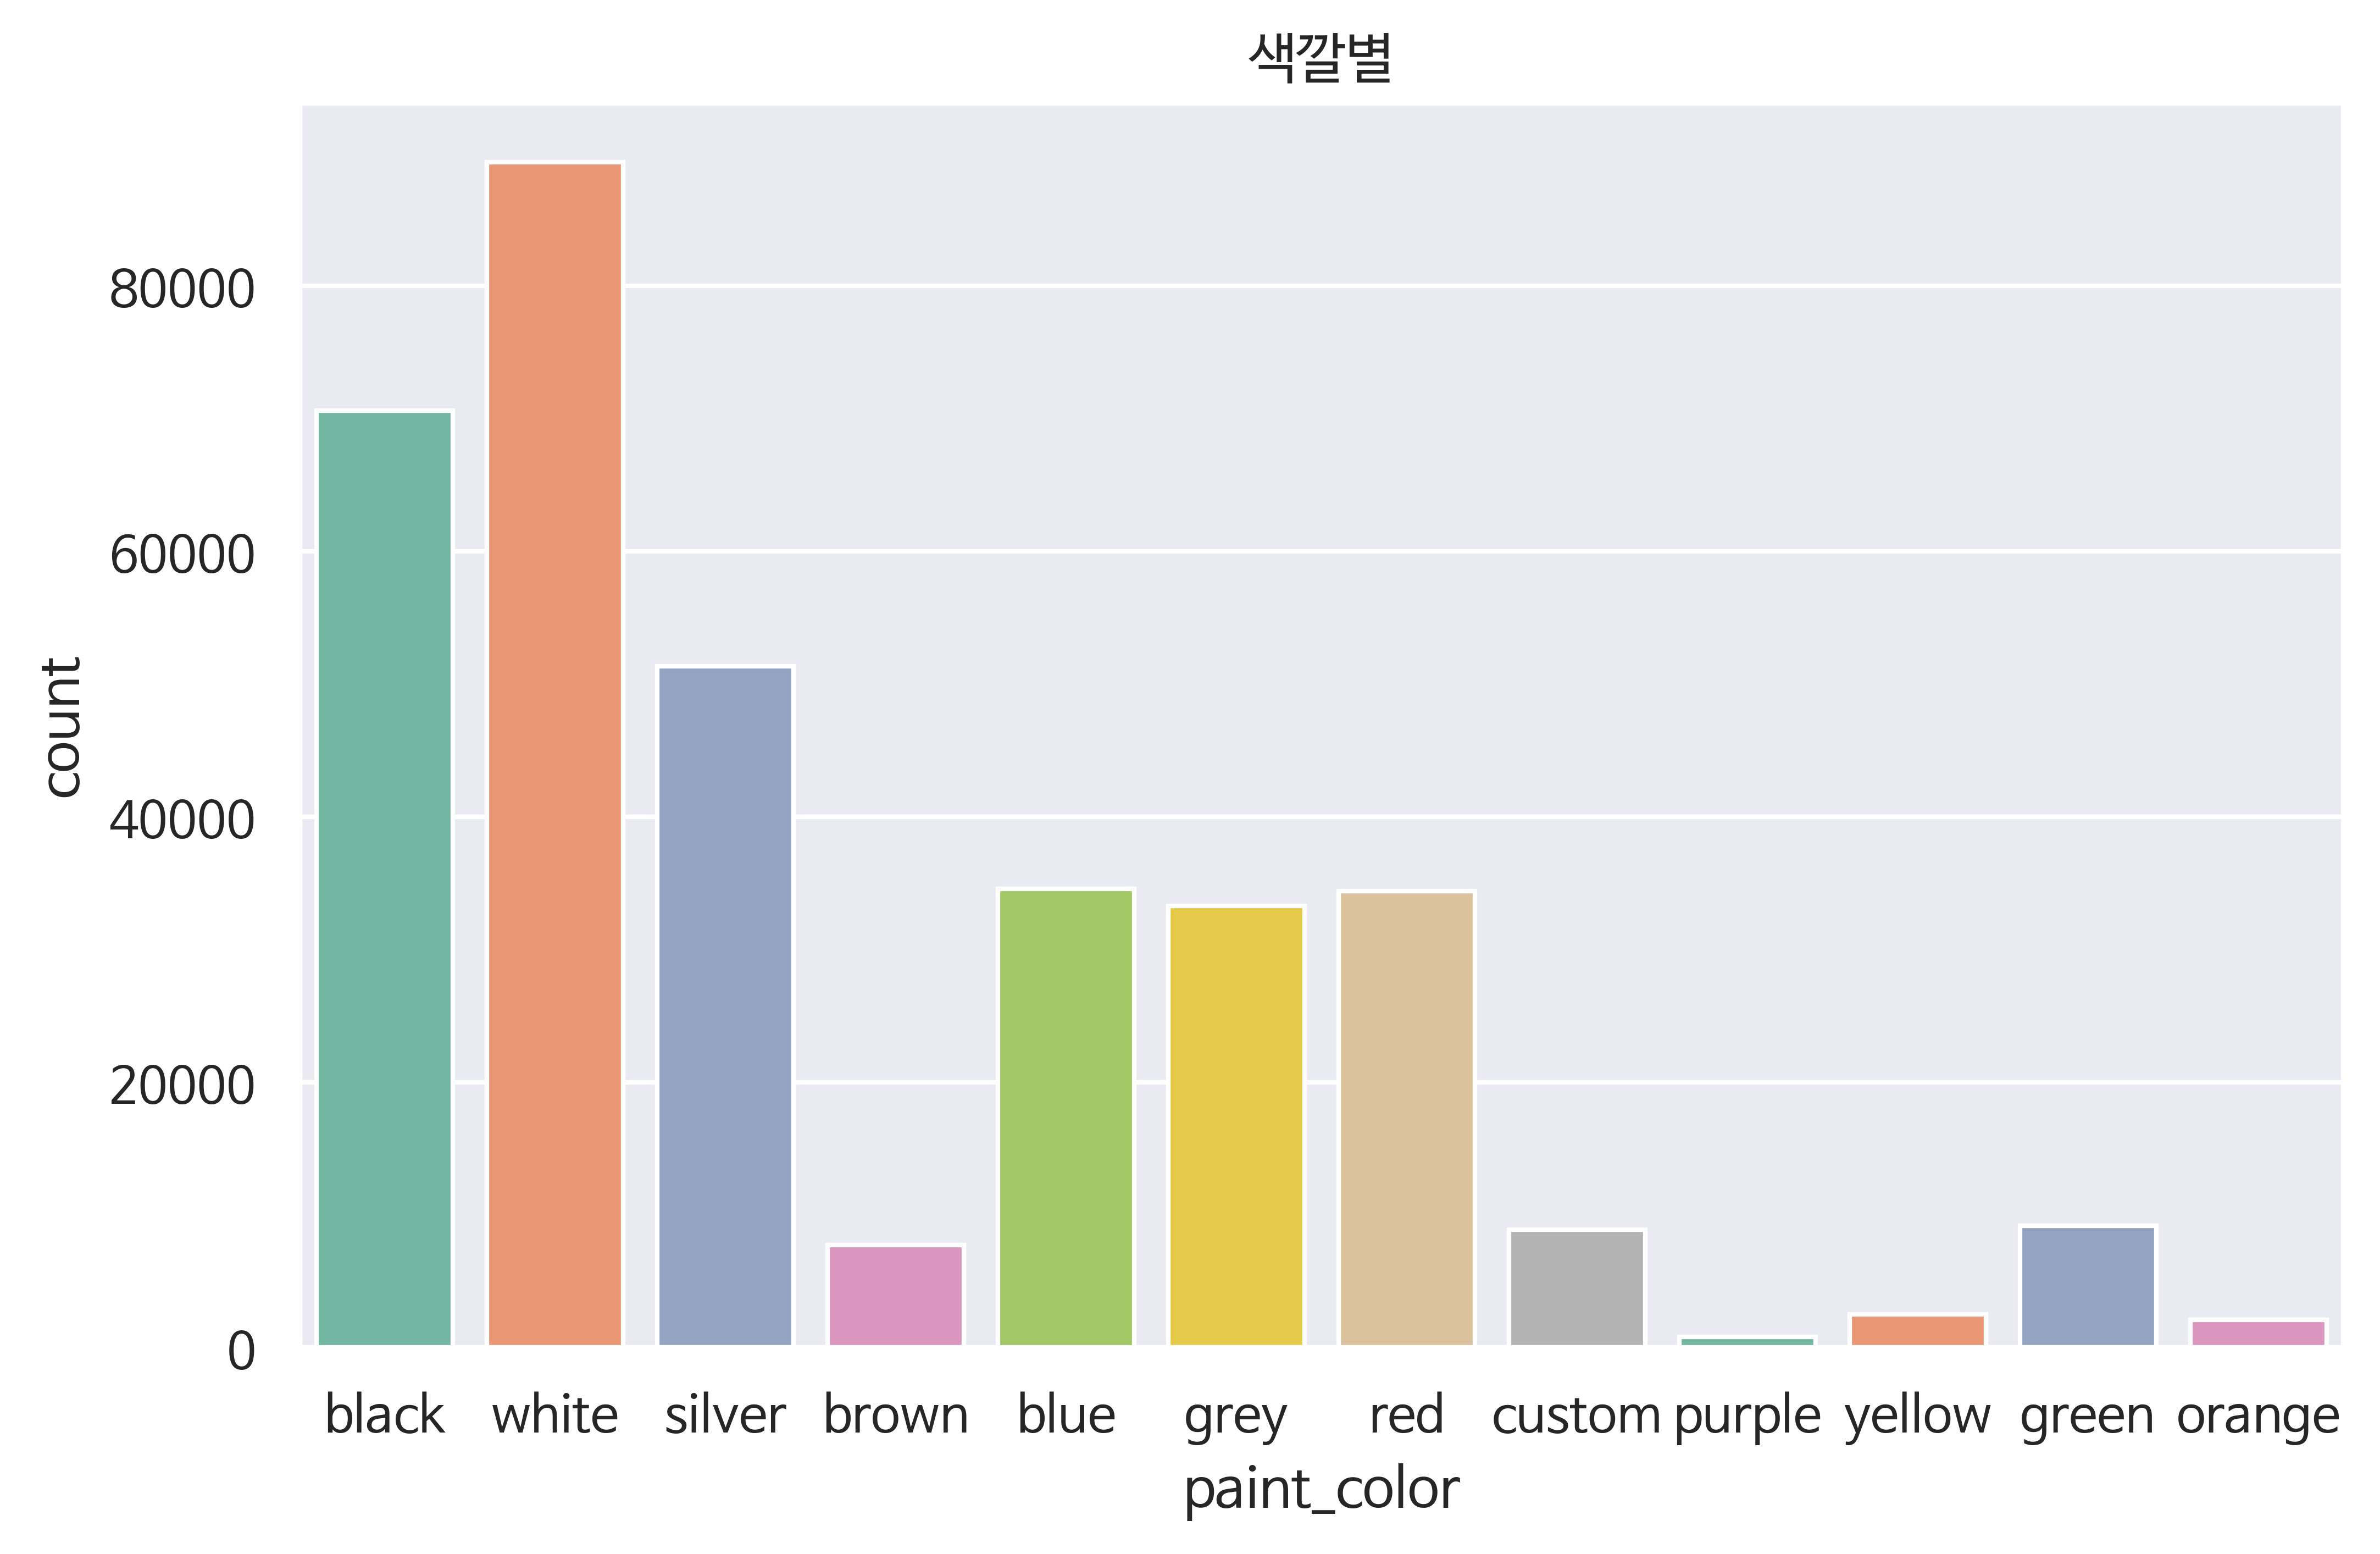

In [146]:
sns.countplot(
    data = df,
    x = "paint_color",
    palette='Set2'
)
plt.title("색깔별")
plt.show

# 결측값 처리

In [157]:
# 제조사와 모델명 다 없는 경우
len(raw_data[raw_data['manufacturer'].isnull() & raw_data['model'].isnull()])

25

In [162]:
# 제조사 없는 경우
len(raw_data[raw_data['manufacturer'].isnull()])

22764

In [164]:
test = raw_data[raw_data['manufacturer'].isnull()]

In [166]:
test['model'].describe()

count                    22739
unique                    8313
top       ALL MAKES AND MODELS
freq                       212
Name: model, dtype: object

In [149]:
len(raw_data[raw_data['condition'].isnull()])

231934

# 변수 탐색
- 고유 ID : id
- 종속변수 : 가격(price)
- 독립변수
  - 카테고리 : 
    - 연료(fuel)
    - 실린더(cylinder)
    - 변속기(transmission)
    - 구동 방식(drive)
    - 차량 크기(size)
    - 색깔(paint_color)
    - 차량 상태(title_status)
    - **차량 타입(type)**
  - 실수형 
      - 연식(year), 주행거리(odometer)
- 제외한 데이터:
  - region_url, model,condition,vin,image_url,description,type

### 종속변수 : 가격(price)

In [40]:
df['price'].describe(percentiles=[0,.50,.75,.80,.90,.999])

count       509577.00
mean         54796.84
std        9575025.12
min              0.00
0%               0.00
50%           9377.00
75%          17955.00
80%          19999.00
90%          27980.00
99.9%        98000.00
max     3600028900.00
Name: price, dtype: float64

In [79]:
# 가격 상위 20개
df['price'].sort_values(ascending=False)[:20]

345972    3600028900
264595    3567587328
473874    2521176519
190773    2490531375
353470    1316134912
86485     1234567890
16015     1172420096
73946      999999999
176537     999999999
282099     999999999
496917     831365932
74292      123456789
466220     123456789
183054     123456789
222547     123456789
3509       123456789
379837     123456789
481420     111111111
109402     111111111
359795     100000000
Name: price, dtype: int64

In [42]:
# 가격 0인 갯수
len(df[df['price'] == 0])

43579

In [43]:
# 아웃라이어로 추정되는 상위 500개의 가격 제거
price = df['price'].sort_values()[:len(df['price']) - 500]

# 가격 0인 row 제거
price_non_zero = price[price != 0]
len(price_non_zero)

465498

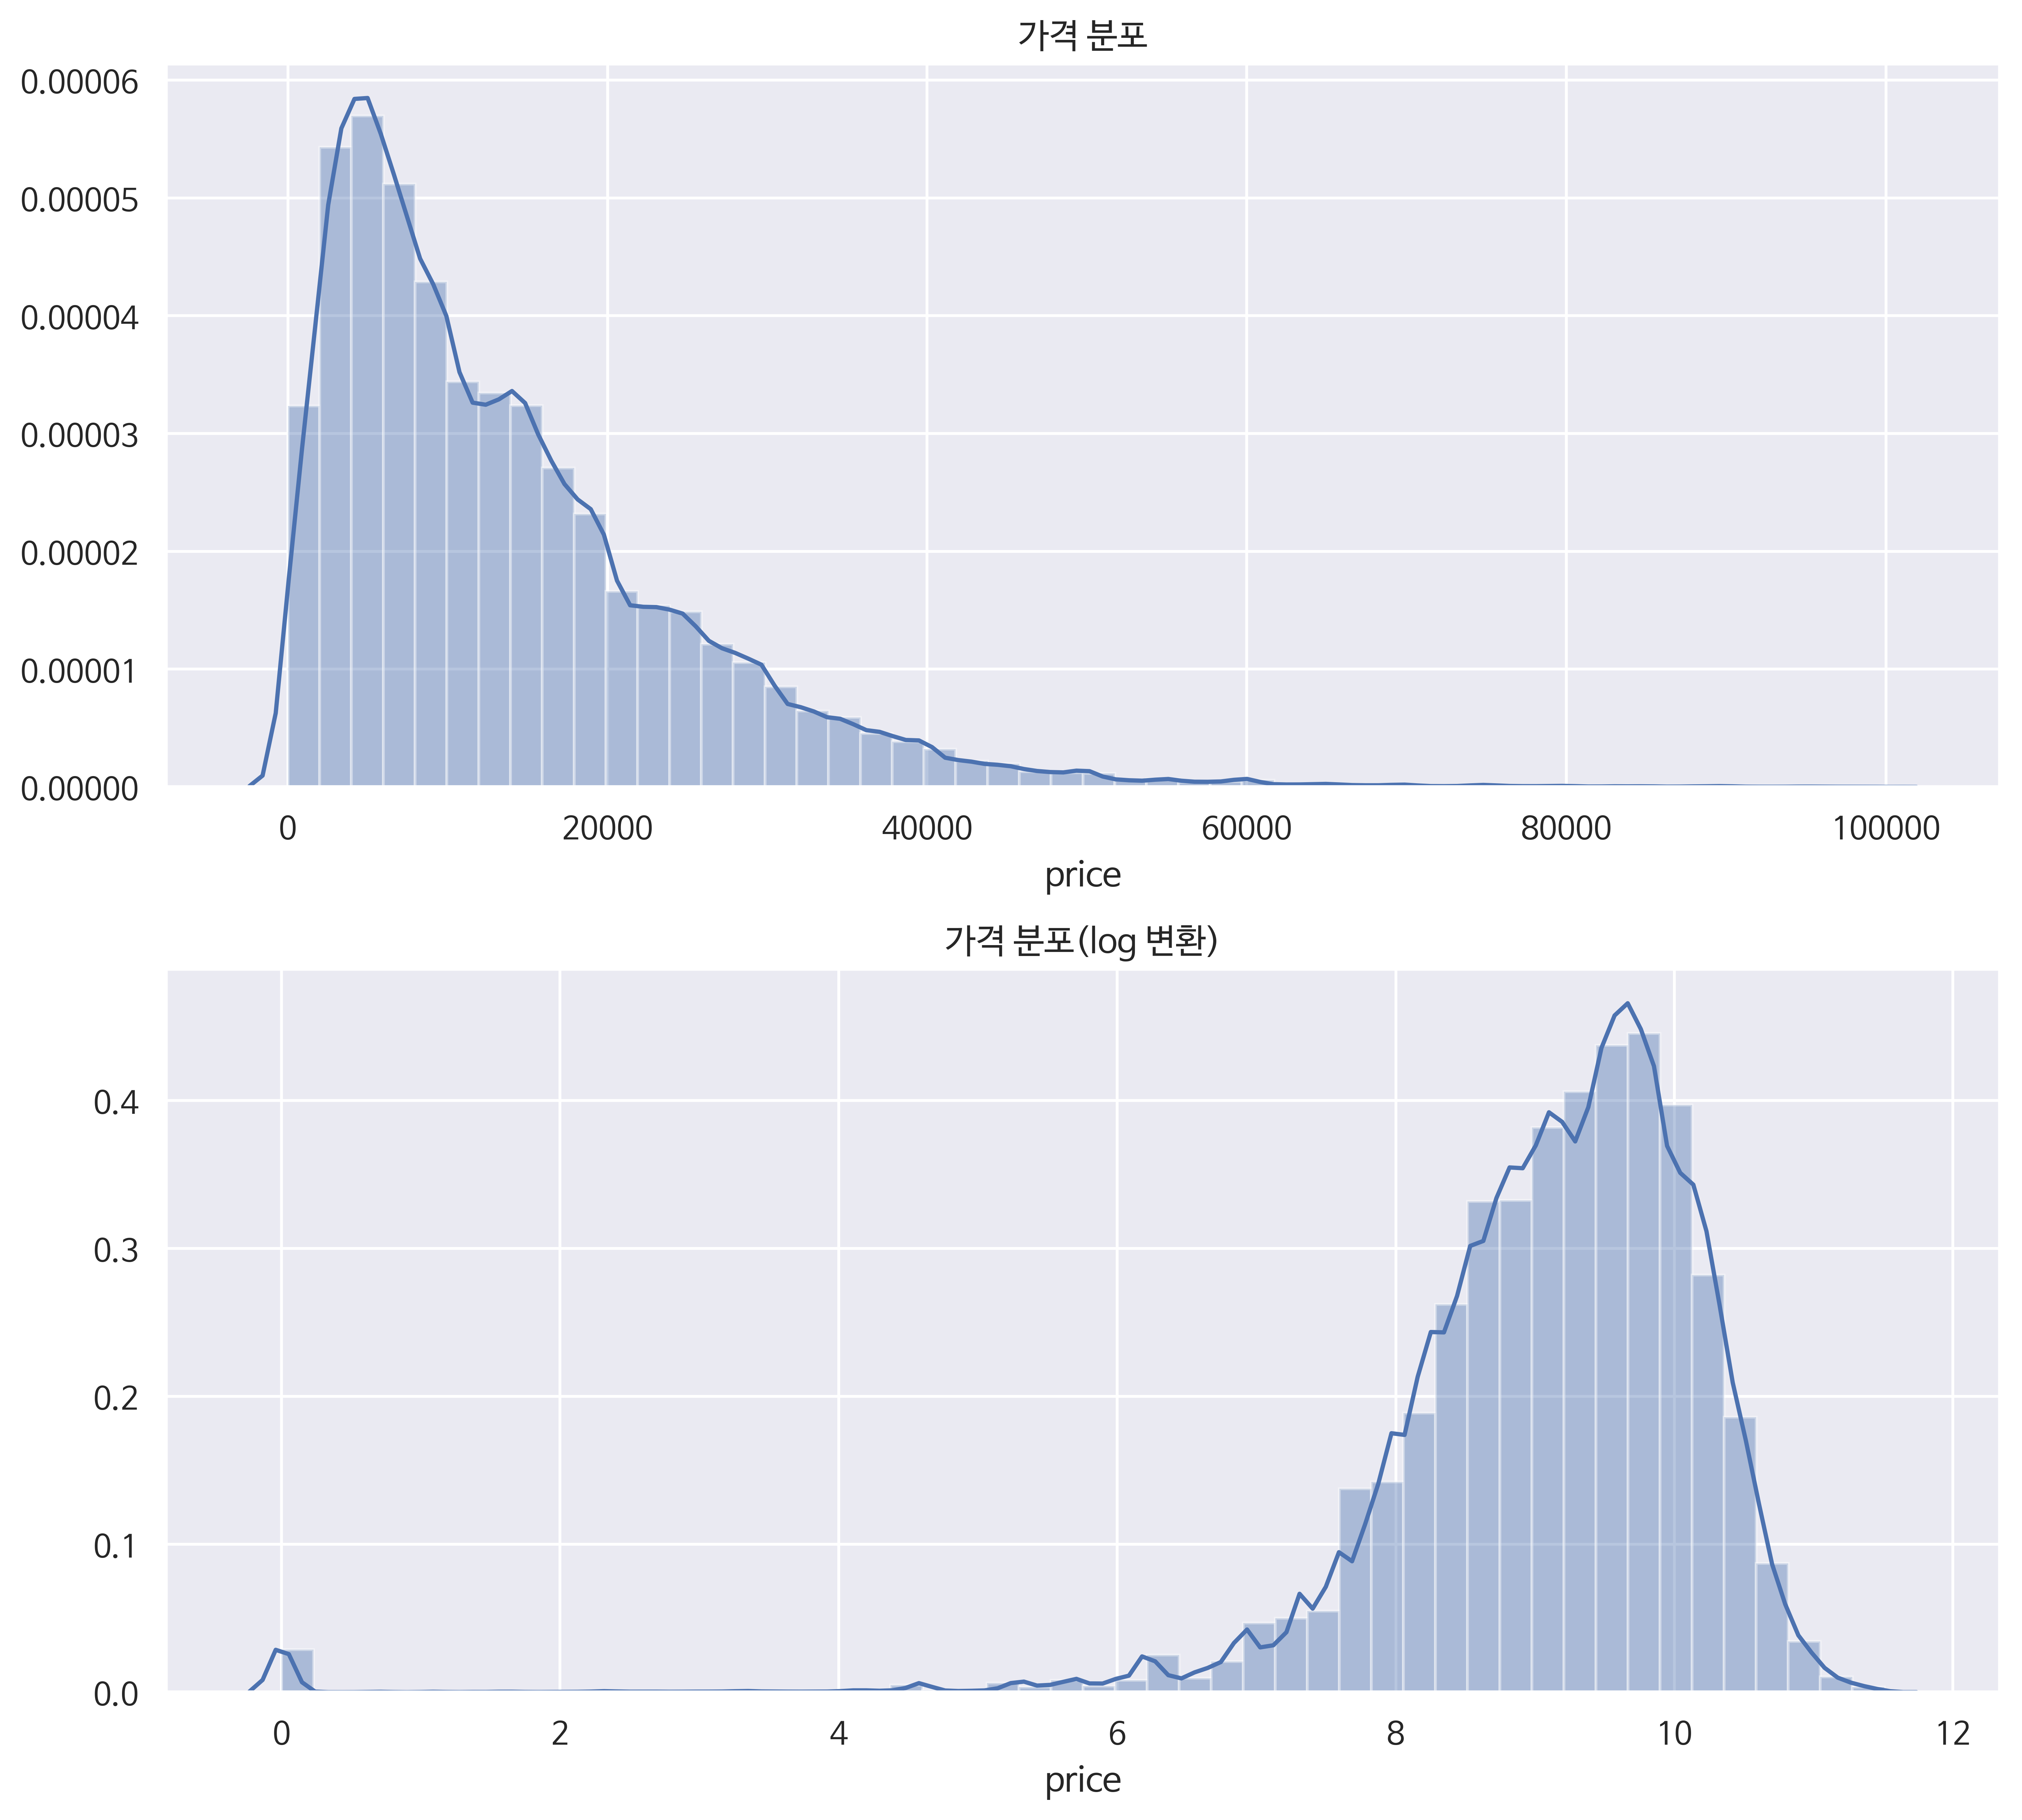

In [115]:
plt.figure(figsize=(10,9))

plt.subplot(211)
sns.distplot(price_non_zero)
plt.title("가격 분포")

plt.subplot(212)
sns.distplot(np.log(price_non_zero))
plt.title("가격 분포(log 변환)")

plt.tight_layout()
plt.show()

## 카테고리 독립변수
- 연료 타입
- 실린더 종류
- 변속기 종류
- 구동 방식
- 차량 크기
- 색깔
- 차종 수리여부
- 차량 타입
- 차량 컨디션
- 제조사
- 주
- 지역

In [105]:
plt.figure(figsize=(15,15))

plt.subplot(421)
sns.countplot(
    data = df,
    y = "fuel",
    palette='Set1',
)
plt.title("연료 타입별")


plt.subplot(422)
sns.countplot(
    data = df,
    y = "cylinders",
    palette='Set1',
    order = df['cylinders'].value_counts().index

)
plt.title("실린더 종류별")


plt.subplot(423)
sns.countplot(
    data = df,
    y = "transmission",
    palette='Set1'
)
plt.title("변속기")

plt.subplot(424)
sns.countplot(
    data = df,
    y = "drive",
    palette='Set1'
)
plt.title("구동 방식")

plt.subplot(425)
sns.countplot(
    data = df,
    y = "size",
    palette='Set1'
)
plt.title("차량 크기")


plt.tight_layout()
plt.show()


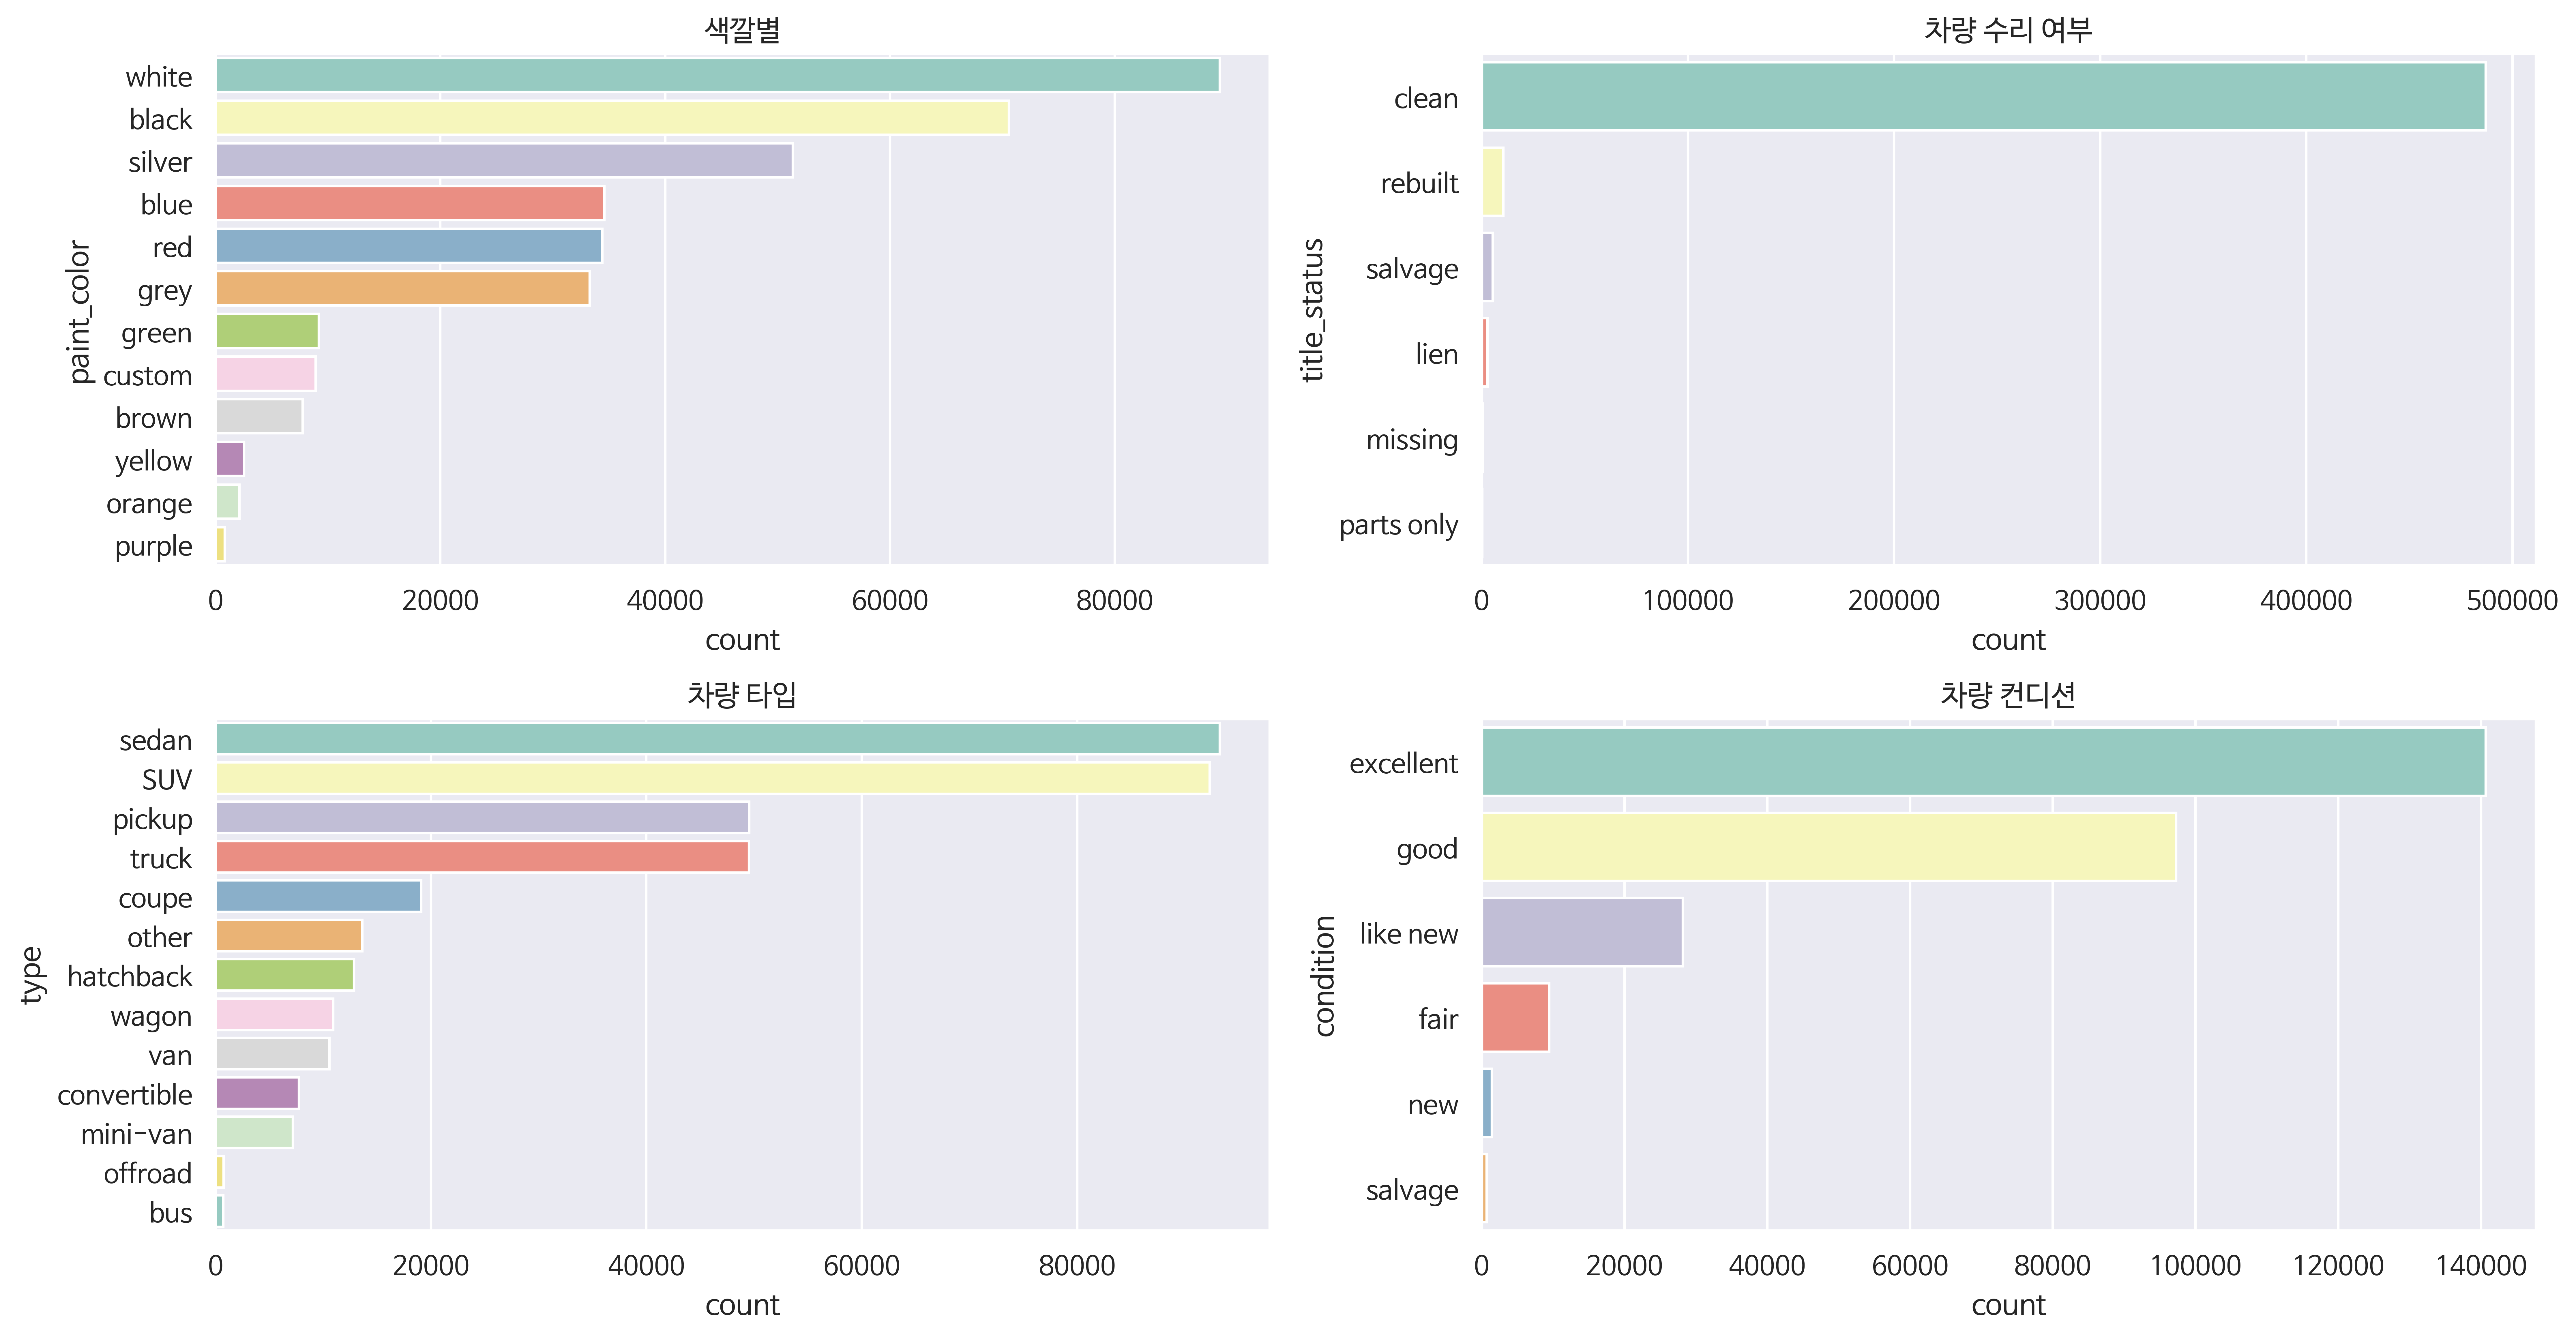

In [116]:
plt.figure(figsize=(15,15))

plt.subplot(421)
sns.countplot(
    data = df,
    y = "paint_color",
    palette='Set3',
    order = df['paint_color'].value_counts().index
)
plt.title("색깔별")


plt.subplot(422)
sns.countplot(
    data = df,
    y = "title_status",
    palette='Set3'
)
plt.title("차량 수리 여부")

# 원래 지우기로 했던거 한번 넣어봤읍니다.
plt.subplot(423)
sns.countplot(
    data = raw_data,
    y = "type",
    palette='Set3',
    order = raw_data['type'].value_counts().index
)
plt.title("차량 타입")

plt.subplot(424)
sns.countplot(
    data = raw_data,
    y = "condition",
    palette='Set3',
    order = raw_data['condition'].value_counts().index
)
plt.title("차량 컨디션")
plt.tight_layout()
plt.show()

- F-검정을 이용한 중요도 검정으로 확인

### 제조사(manufacturer)

In [109]:
df['manufacturer'].describe()

count     486813
unique        43
top         ford
freq       92601
Name: manufacturer, dtype: object

In [107]:
plt.figure(figsize=(15,15))
sns.countplot(
    data = df,
    y = "manufacturer",
    palette='Set3',
    order = df['manufacturer'].value_counts().index
)
plt.title("제조사")
plt.show()

### 주(state)

In [121]:
plt.figure(figsize=(15,15))
sns.countplot(
    data = raw_data,
    y = "state",
    palette='Set3',
    order = raw_data['state'].value_counts().index
)
plt.title("주별 게시글")
plt.show()

### 지역(region)

In [91]:
df['region'].describe()

count           509577
unique             403
top       fayetteville
freq              4501
Name: region, dtype: object

## 실수형 독립변수
- 연식
- 주행거리

In [129]:
df['year'].describe(percentiles=[0,.01])

count   508050.00
mean      2009.66
std          8.57
min       1900.00
0%        1900.00
1%        1970.00
50%       2011.00
max       2021.00
Name: year, dtype: float64

In [128]:
df["odometer"].describe(percentiles=[.25,.50,.75,.90,.999])

count     417253.00
mean      101729.96
std       107378.99
min            0.00
25%        49488.00
50%        94894.00
75%       138778.00
90%       179664.80
99.9%     999999.00
max     10000000.00
Name: odometer, dtype: float64

In [126]:
df["odometer"].sort_values(ascending=False)[:10]

170043   10000000.00
89513    10000000.00
155140   10000000.00
89496    10000000.00
175539    9999999.00
277414    9999999.00
81579     9999999.00
102772    9999999.00
444366    9999999.00
445339    9999999.00
Name: odometer, dtype: float64

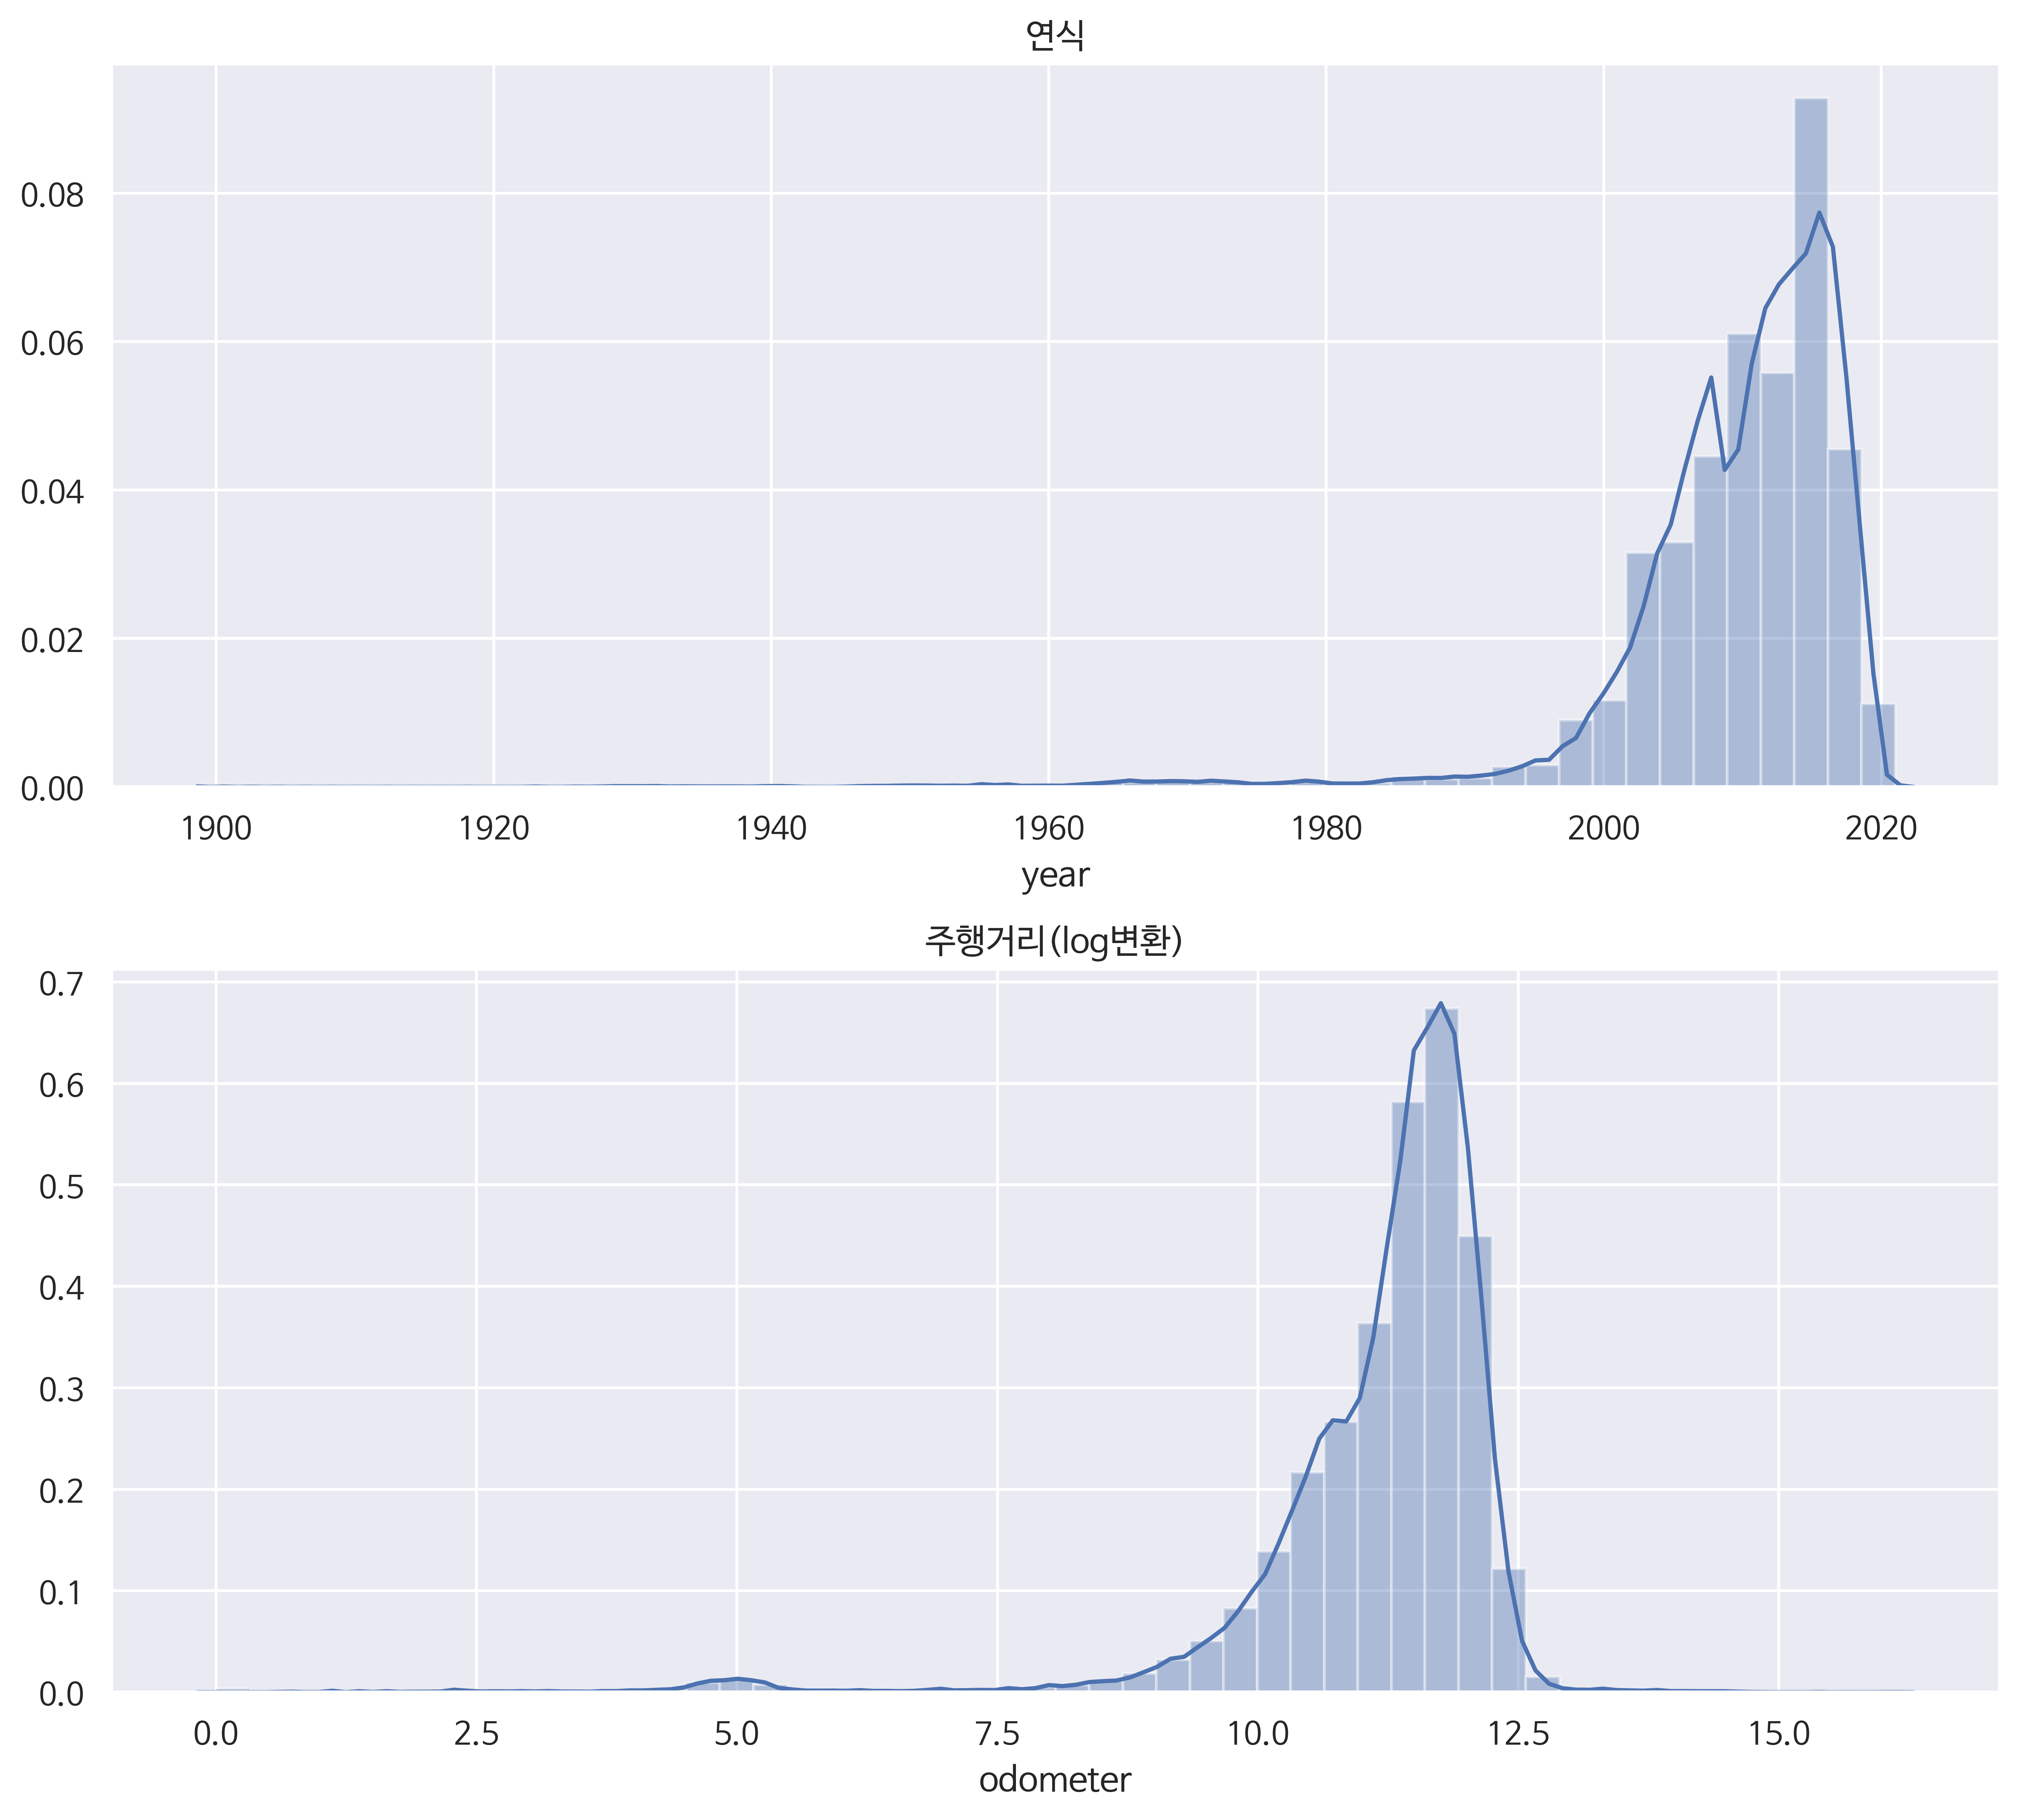

In [113]:
# 0과 null값을 제거
filtered_odmeter = df[df["odometer"].notnull() & df["odometer"]!= 0]["odometer"]
filtered_year = df[df["year"].notnull() & df["year"] != 0]['year']

plt.figure(figsize=(10,9))

plt.subplot(211)
sns.distplot(filtered_year)
plt.title("연식")


plt.subplot(212)
sns.distplot(np.log(filtered_odmeter))
plt.title("주행거리(log변환)")

plt.tight_layout()
plt.show()